**<h1 align="center">HAM10000 - Skin Lesion Classification</h1>**
<h2 align="center">COMP9444 - Term 3, 2023</h2>
<h3 align="center">Smashing the Assignment</h3>

<p align="center">Adam Jackson [z5256015], Andar Sitohang [z5424491], Arne Witt [z5523260], Corinna Huo [z5023782], Hongliang Sun [z5254615]</p>

<br>
<br>

**<p align="center">Dataset: Humans Against Machines 10000 </p>**
<p align="center">Objective: To detect Cancerous and Non-cancerous Skin Lesions using Neural Networks</p>
<br>
<br>

    Abstract
        
This project endeavors to leverage the capabilities of deep neural networks to analyze and classify skin lesions from the Humans Against Machines 10000 dataset. By training a sophisticated model, the goal is to accurately differentiate between benign and malignant conditions, contributing to advancements in automated medical diagnosis. The dataset HAM10000 was released as a training dataset for machine learning purposes and is publicly accessible via the ISIC (International Skin Imaging Collaboration) archives. The dataset consists of 10015 images which are classified into a collection of the most important diagnostic cases in skin lesions.

---
### <h3 style="color:deeppink;"><strong>Introduction</strong></h3>
---

<h5 style="color:lightgreen;"><strong>Introduction</strong></h5>


Australia has one of the highest rates of skin cancer in the world. With over two-thirds of the Australian population facing a skin cancer diagnosis in their lifetime, there is an urgent need for professional diagnostic tools **[1]**. Melanoma, a particularly aggressive form of skin cancer, has been seen to have a high survival rate with early detection, emphasising the critical necessity for prompt and accurate diagnosis tools.

As a response to the limited amount of properly labelled datasets of skin lesions, the International Skin Imaging Collaboration (ISIC) released the HAM10000 (Humans Against Machines with 10,000 images) dataset. This dataset involved a comprehensive collection of pigmented skin lesion images split into seven different classes, 3 malignant and 4 non-cancerous. This dataset addresses the gap in skin cancer detection by providing a diverse and extensive dataset for neural network training in the diagnosis of pigmented skin lesions **[2]**.

All images and metadata in the HAM10000 dataset which was used for this assignment project can be accessed through Harvard's Dataverse and the ISIC, which are open source and helps facilitate its widespread use and research application.

<br>

<h5 style="color:lightgreen;"><strong>Motivation</strong></h5>

The motivation behind the this group project is the urgency of Australia to obtain an accurate and effective neural network model which can trained in the detection of skin cancer in pigmented skin lesions. With the increasing prevalence of skin cancer globally, and especially in Australia, the development of advanced diagnostic tools which can be deployed to medical professional in the field is critical. This dataset and the subsequent research derived from it aim to leverage the advancements in artificial intelligence and machine learning to significantly improve early detection rates of skin cancer. Therefore, the primary motivation of this group project is to seek to reduce mortality rates associated with skin cancer, primarily through early detection with state of the art diagnostic capabilities.

<br>

<h5 style="color:lightgreen;"><strong>Problem Statement</strong></h5>

To develop accurate and effective neural network model in the detection of skin cancer in pigmented skin lesions using the HAM10000 dataset.


---
### <h3 style="color:deeppink;"><strong>Data Sources</strong></h3>
---

<h5 style="color:lightgreen;"><strong>Data Sources for HAM10000 Dataset</strong></h5>

<strong>Dataset</strong>: Humans Against Machines with 10,000 training images.

<br>

<strong>Source/s</strong>: This dataset is publically available and can be accessed through a variety of methods such as Harvard's Dataverse, the International Skin Imaging Collaboration archives, Kaggle, etc.
* https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T
* https://challenge2018.isic-archive.com
* https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000

<br>

<strong>Description</strong>: 
* This dataset consists of 10,015 images of pigmented skin lesions collected from a diverse population over a period of 20 years. 
* The primary source where the images come from are the Department of Dermatology at the Medical University of Vienna, Austria, and a skin cancer practice in Queensland Australia.
* This dataset consists of images ranging from benign non-cancerous to malignant cancerous.

---
### <h3 style="color:deeppink;"><strong>Exploratory Analysis of Data</strong></h3>
---

The HAM10000 dataset consists of 10,015 dermatoscopic images of skin lesions. All the images are of the same size, with a height of 450 pixels and a width of 600 pixels. The images are colored and have high resolution.

There are seven classes being the seven skin lesion types in the dataset:
* Actinic Keratoses / Bowen’s Disease (akiec)
* Basal Cell Carcinoma (bcc)
* Benign Keratoses (bkl)
* Dermatofibroma (df)
* Melanoma (mel)
* Melanocytic Nevi (nv)
* Vascular Lesions (vasc)

Three skin lesion types (Actinic Keratoses/Bowen's disease, Basal Cell Carcinoma and Melanoma) are active cancer types. 

<h5 style="color:lightgreen;"><strong>Features/Variables in the dataset</strong></h5>

* <strong> lesion_id </strong>: each lesion is assigned an unique identify number and name as lesion id. A single lesion id is likely to be linked with multiple image id

* <strong> Image_id</strong>: each image is assigned an unique identify number and name as image id. Image id is used to find the images in the data directory

* <strong>dx</strong>: skin lesion type. There are 7 skin lesion types available in this dataset. 

* <strong> dx_type</strong>: Diagnosis type. Diagnosis type refers to how the skin lesion is verified. There are 4 types in this dataset: histopathology (histo), confocal, consensus and follow-up.

* <strong> dx_type</strong>: Age of the patient

* <strong>sex</strong>: Gender of the patient

* <strong>Localization</strong>: Area of the body the skin lesion is located on

<strong> Some key insights are observed</strong>:

* The dataset is unbalanced. Around 67% of the images are for skin lesion type Melanocytic Nevi (nv). Other 6 classes are in the remaining 33% of the dataset. This skewed and uneven distribution could potentially introduce bias into the dataset

* Small number of missing values are identified, only in the age features. ​

* All the images are the same size as mentioned above, reducing the amount of preprocessing​

* Images with same lesion id are different views of the same area, taken from varying angles. Include these images in our dataset will potentially provide redundant information.


In [7]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from tqdm import tqdm
from shutil import copyfile,move
from glob import glob

In [8]:
# Read  and load the data
os.listdir('data')
data = pd.read_csv('data/HAM10000_metadata.csv')

In [9]:
# label each calss 
dx_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

# Summary of the data 
def summary_table(df):
    summary = pd.DataFrame(df.dtypes,columns=['Data Type'])
    summary['Missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    return summary

In [8]:
#Copy images into one folder
os.mkdir('data/HAM10000')
part1 = 'data/HAM10000_images_part_1'
part2 = 'data/HAM10000_images_part_2'

for part in [part1,part2]:
    for img in tqdm(os.listdir(part)):
        copyfile(os.path.join(part,img),os.path.join('data/HAM10000',img))

100%|█████████████████████████████████████████████████████████████████████████████| 5015/5015 [00:30<00:00, 163.55it/s]


In [10]:
#Include filepath and check image size
directory_path = 'data/HAM10000'
image_extensions = ['jpg', 'jpeg', 'png', 'gif', 'bmp']
data['filepath'] = data['image_id'].apply(lambda x: os.path.join(directory_path, x + '.jpg')) 
data['dx_name'] = data['dx'].map(dx_type_dict)

def get_image_size(filepath):
    with Image.open(filepath) as img:
        return img.size

data['image_size'] = data['filepath'].apply(get_image_size)

# Check if all images have the same dimensions
first_dimensions = data['image_size'].iloc[0]
if not all(dim == first_dimensions for dim in data['image_size']):
    print("Not all images have the same dimensions.")
else:
    print("All images have the same dimensions.")

All images have the same dimensions.


In [11]:
data

lesion_id      image_id     dx dx_type   age     sex localization  \
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp   
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp   
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp   
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp   
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear   
...            ...           ...    ...     ...   ...     ...          ...   
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen   
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen   
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen   
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face   
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back   

                             filepath                         dx_name  \
0      data/HAM10000\ISIC_0027419.jpg  Benign keratosis-like lesions    
1      data/HAM10000\ISIC_0025030.jpg  Benign keratosis-like lesions    
2      data/HAM10000\ISIC_0026769.jpg  Benign keratosis-like lesions    
3      data/HAM10000\ISIC_0025661.jpg  Benign keratosis-like lesions    
4      data/HAM10000\ISIC_0031633.jpg  Benign keratosis-like lesions    
...                               ...                             ...   
10010  data/HAM10000\ISIC_0033084.jpg               Actinic keratoses   
10011  data/HAM10000\ISIC_0033550.jpg               Actinic keratoses   
10012  data/HAM10000\ISIC_0033536.jpg               Actinic keratoses   
10013  data/HAM10000\ISIC_0032854.jpg               Actinic keratoses   
10014  data/HAM10000\ISIC_0032258.jpg                        Melanoma   

       image_size  
0      (600, 450)  
1      (600, 450)  
2      (600, 450)  
3      (600, 450)  
4      (600, 450)  
...           ...  
10010  (600, 450)  
10011  (600, 450)  
10012  (600, 450)  
10013  (600, 450)  
10014  (600, 450)  

[10015 rows x 10 columns]

All images are same size with a height of 450 pixels and a width of 600 pixels. This consistency is advantages as it reduce the amount of preprocessing for standarizing the image sizes.

<h5 style="color:lightgreen;"><strong>Sample Images for Each Skin Lesion Type </strong></h5>

All images are in color, clear, and the skin lesions are at the center.

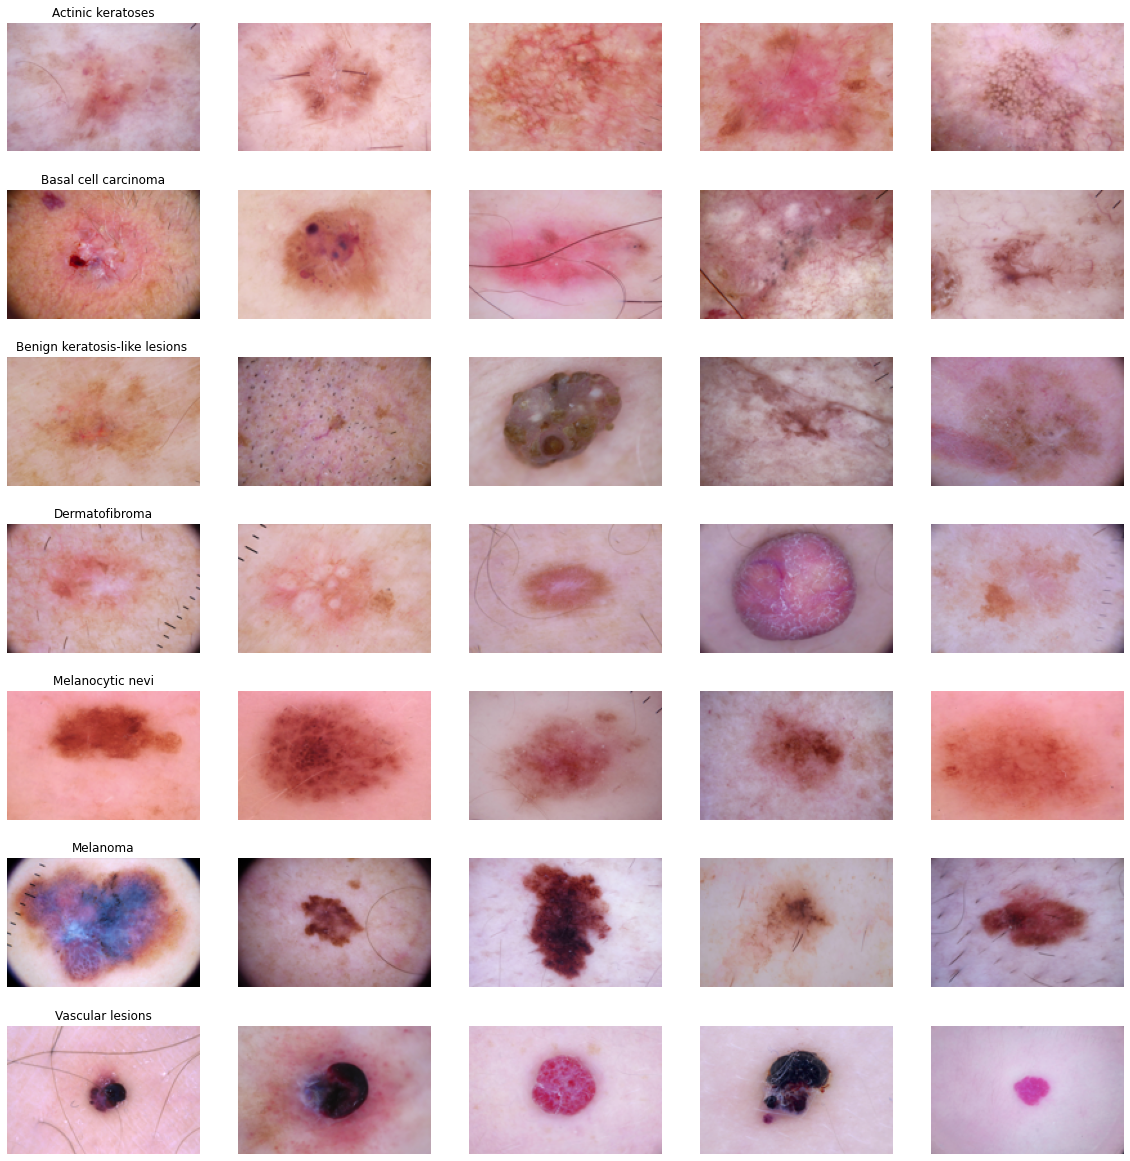

In [14]:
#Plot samples
data['image_data'] = data['filepath'].map(lambda x: np.asarray(Image.open(x).resize((150,100))))
n_sample = 5
fig, m_axs = plt.subplots(7, n_sample, figsize = (4*n_sample, 3*7))

for i, (type_name, type_rows) in enumerate(data.sort_values(['dx_name']).groupby('dx_name')):
    m_axs[i, 0].set_title(type_name)
    for j, (_, c_row) in enumerate(type_rows.sample(n_sample, random_state=2018).iterrows()):
        m_axs[i, j].imshow(c_row['image_data'])
        m_axs[i, j].axis('off')

In [19]:
#new summary table after dropping the duplicates
columns_to_include = ['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization']
summary_table(data[columns_to_include])

Data Type  Missing  Uniques
lesion_id       object        0     7470
image_id        object        0    10015
dx              object        0        7
dx_type         object        0        4
age            float64       57       18
sex             object        0        3
localization    object        0       15

The summary table provides valuable insights into the dataset:

1. The dataset comprises 7 classes (dx = 7).
2. There is a small number of missing values (57 records), limited to the Age feature.
3. Certain lesion IDs are associated with more than one image.

<h5 style="color:lightgreen;"><strong>Sample Images where lesion IDs are associated with more than one image </strong></h5>

Images with same lesion id are different views of the a common area, captured from varying angles. Incorporating these images in our dataset will potentially provide redundant information since they essentially just show different versions of the same area.

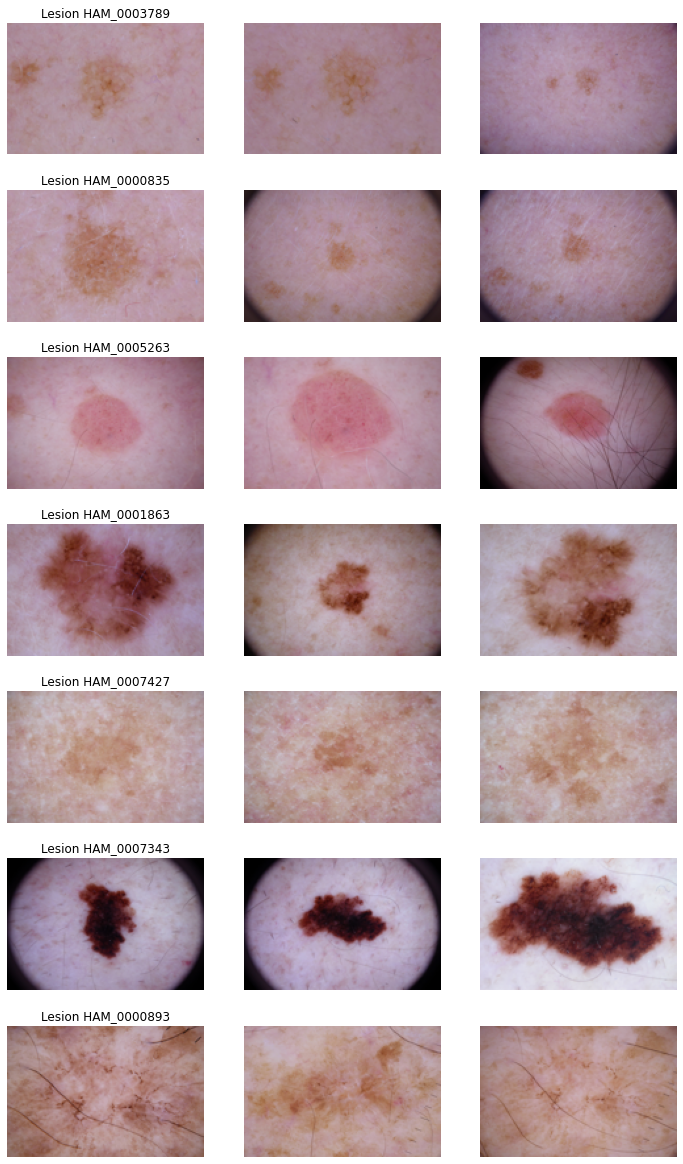

In [23]:
# plot samples where lesion ids have more than 1 images
import random

n_samples = 3  
fig, m_axs = plt.subplots(7, n_samples, figsize=(4 * n_samples, 3 * 7))

lesion_counts = data['lesion_id'].value_counts().reset_index()
lesion_counts.columns = ['lesion_id', 'image_count']

# Filter for lesions with more than 1 image
selected_lesions = lesion_counts[lesion_counts['image_count'] > 1]['lesion_id']
selected_lesions = filtered_lesions.head(7)

for i, lesion_id in enumerate(selected_lesions):
    selected = data[data['lesion_id'] == lesion_id]
    m_axs[i, 0].set_title(f'Lesion {lesion_id}')
    
    if len(selected) < n_samples:
        sample_images = selected
    else:
        sample_images = selected.sample(n_samples, random_state=2018)
    
    for j, (_, c_row) in enumerate(sample_images.iterrows()):
        m_axs[i, j].imshow(c_row['image_data'])  
        m_axs[i, j].axis('off')

<h5 style="color:lightgreen;"><strong>Data Visualisation </strong></h5>

This section includes some charts for this dataset to gain insights into the distribution of variables and identify trends.

A summary of the insights identified:
1. The dataset is imbalance, evident in skin lesion types, ages, localization, gender, and diagnosis type.
2. The majority of samples are verified either through Histopathology or follow-up.
3. Gender shows a consistent proportion, with a slightly higher percentage of males. However, males exhibited a higher proportion in each lesion type compared to female consistently.
4. Most samples are from patients age range from 35 to 75
5. most of the skin lesion images are from areas of the body like back, lower extremetis and trunk.

<strong>Skin Lesion Type Distribution<strong>

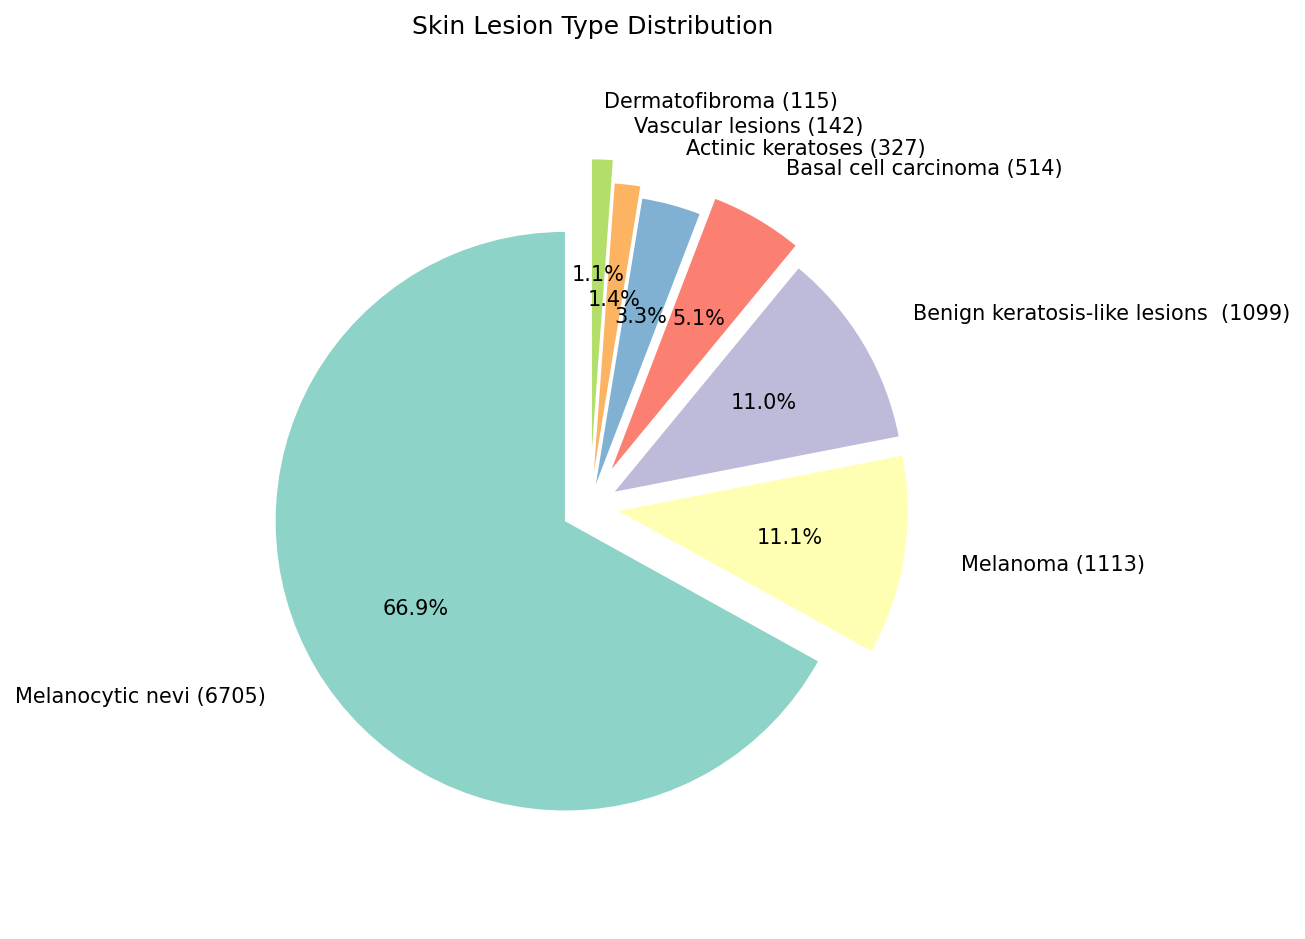

In [24]:
#Plot frequency graph

# Calculate the frequency of each skin lesion type
skin_lesion_counts = data['dx_name'].value_counts()

# Define which slice(s) to explode (separate from the center)
explode = (0.1, 0.1, 0.1, 0.15,0.08,0.12,0.2)  # Here, the first slice (0.1) is exploded, while the others (0) remain at the center

# Create a pie chart with the specified explosion
plt.figure(figsize=(6, 6), dpi=150)
plt.pie(skin_lesion_counts, labels=[f'{label} ({count})' for label, count in zip(skin_lesion_counts.index, skin_lesion_counts)], autopct='%1.1f%%', startangle=90, explode=explode,labeldistance=1.2, colors=plt.cm.Set3.colors)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.title('Skin Lesion Type Distribution')
plt.subplots_adjust(top=1.1)

plt.show()

The pie chart above shows a significant imbalance in the dataset. Melanocytic nevi (nv) stands out as the dominant class, representing 67% of the entire dataset. However,certain classes like Dermatofibroma (df) and Vascular Lesions (vasc) have very limited representation, each consisting of just 100+ samples, which is less than 2% of the total dataset. This skewed and imbalanced distribution raises concerns and challenges during the model training process as it may introduce bias to the dataset.

<strong>Diagonis Type Distribution<strong>

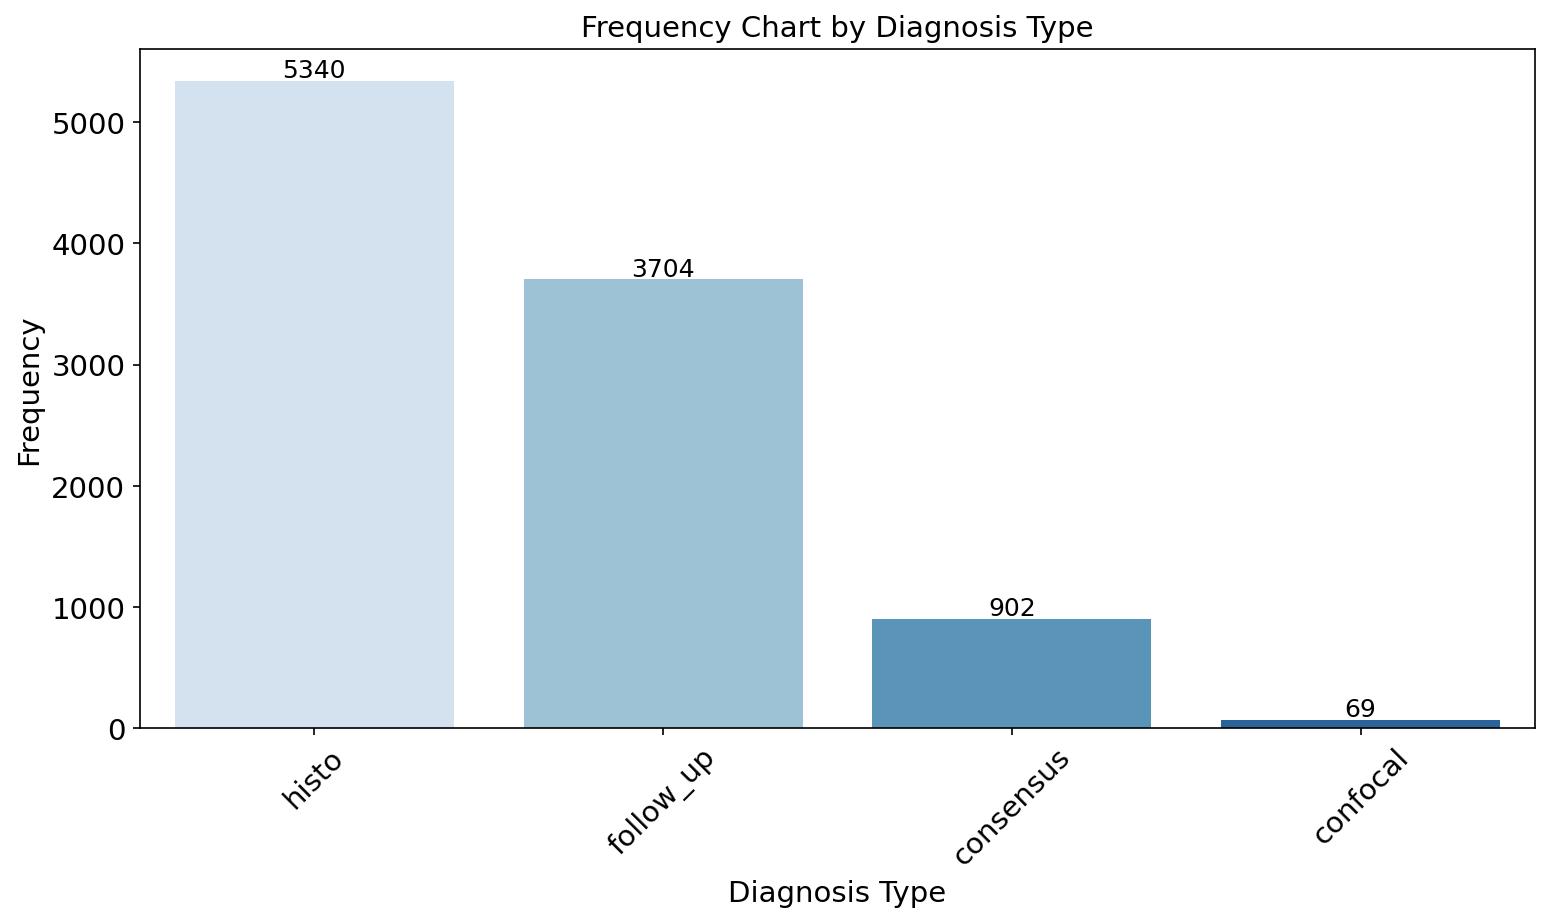

In [25]:
#Diagonose Type

plt.figure(figsize=(12, 6), dpi=150)
ax = sns.countplot(x='dx_type',data=data, order = data['dx_type'].value_counts().index, palette = 'Blues')
plt.xlabel('Diagnosis Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Frequency Chart by Diagnosis Type', fontsize=14)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.xticks(rotation=45) 
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 
plt.show()

The diagnosis type refers to how the skin lesion is verified. In this dataset, there are four verification methods: Histopathology (histo), consensus, confocal, and follow-up. The majority of samples are verified either through Histopathology or follow-up.

<strong>Gender Distribution<strong>

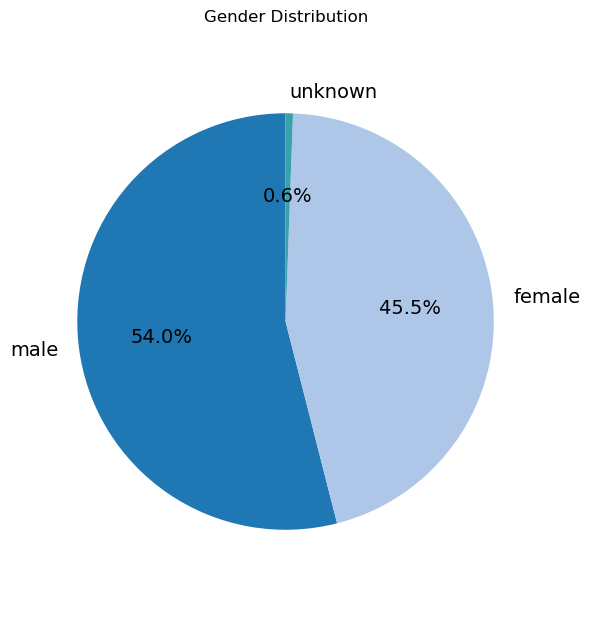

In [27]:
#Plot Gender
gender_counts = data['sex'].value_counts()

# Create a pie chart
plt.figure(figsize=(6,6), dpi=100)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#aec7e8', '#36a2ac'],textprops={'fontsize': 14})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender Distribution')

plt.subplots_adjust(top=1.1)

plt.show()

A similar proportion observed in gender, with a slightly higher percentage of males​

<strong>Lesion type and Gender Distribution<strong>

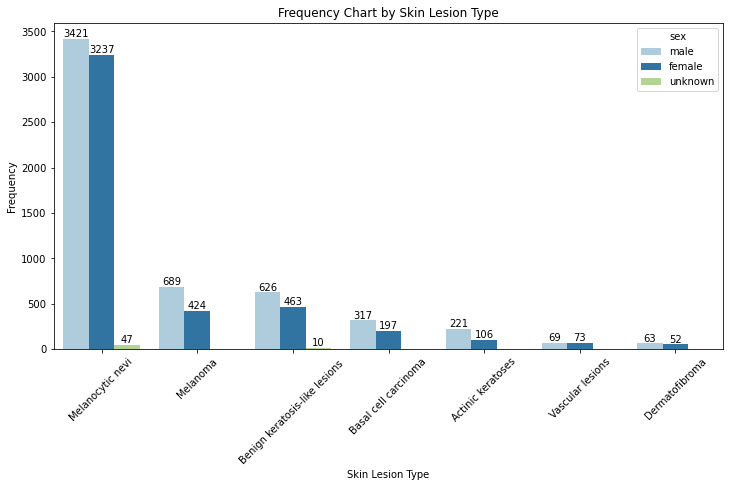

In [26]:
# Lesion type and gender

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='dx_name', hue = 'sex', data=data, order = data['dx_name'].value_counts().index, palette = 'Paired')
plt.xlabel('Skin Lesion Type')
plt.ylabel('Frequency')
plt.title('Frequency Chart by Skin Lesion Type')

for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45) 
plt.show()

Males exhibited a higher proportion in each lesion type compared to female consistently.

<strong>Localisation Distribution<strong>

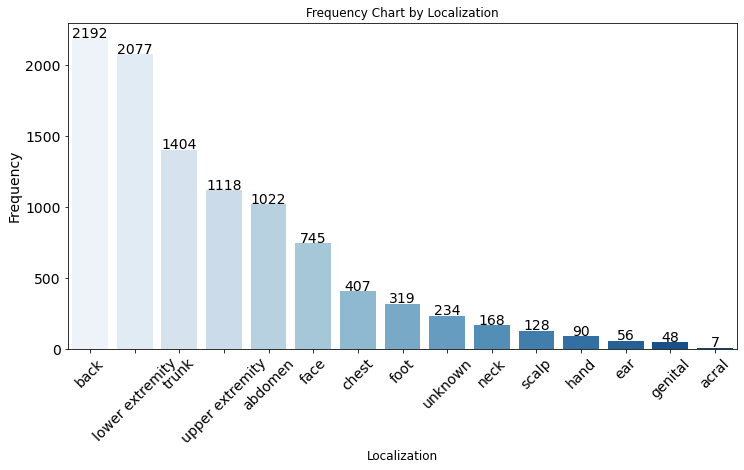

In [28]:
# Localisation

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='localization',data=data, order = data['localization'].value_counts().index, palette = 'Blues')
plt.xlabel('Localization', fontsize=12)
plt.ylabel('Frequency', fontsize=14)
plt.title('Frequency Chart by Localization')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=14, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.xticks(rotation=45) 
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 

plt.show()

The bar chart shows the localisation this dataset is not balanced. The affected area is primarily concentrated in areas such as the back, lower extremities, and trunk.

<strong>Age Distribution<strong>

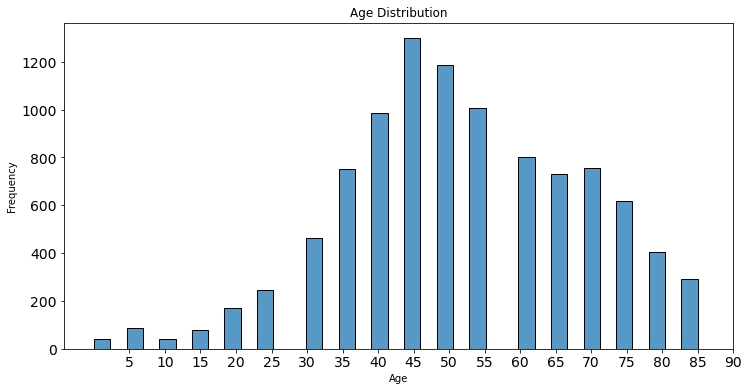

In [29]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=data, x='age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# Adjust x-axis ticks for better readability
xticks = [5,10, 15, 20,25, 30, 35,40,45, 50,55, 60,65, 70,75, 80,85, 90]
plt.xticks(xticks)
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14) 


plt.show()

Majority of the samples are from patients with ages ranging from 35 to 75

---
### <h3 style="color:deeppink;"><strong>Literature Review & Preprocessing Techniques</strong></h3>
---

Preprocessing explanation

<h5 style="color:lightgreen;"><strong>Step 1: Import Libraries</strong></h5>

In [2]:
import numpy as np 
from tqdm import tqdm
import pandas as pd 
import os

import torch
import os
import random
import torchvision
import pandas as pd
import torch.nn as nn
import numpy as np
from torchvision import transforms, datasets
from shutil import copyfile, move
from torch.utils.tensorboard import SummaryWriter
from barbar import Bar
from torchsummary import summary
from ignite.metrics import Accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score

<h5 style="color:lightgreen;"><strong>Step 2: Parsing the Raw Data</strong></h5>

In [2]:
# Dataset is downloaded into local working directory in a file labelled as 'data'
os.listdir('data')

['HAM10000_metadata.csv',
 'hmnist_28_28_RGB.csv',
 'hmnist_28_28_L.csv',
 'HAM10000_images_part_2',
 'HAM10000_images_part_1',
 'hmnist_8_8_RGB.csv',
 'ham10000_images_part_2',
 'ham10000_images_part_1',
 'hmnist_8_8_L.csv']

In [3]:
# Load the contents of the data directory into a dataframe
data = pd.read_csv('data/HAM10000_metadata.csv')

# Print the value counts for the 'dx' column
print(f"The values found in the dx column are: \n{data['dx'].value_counts()}")

# number of classes
print(f"\nThe number of classes found is {data['dx'].nunique()}")

The values found in the dx column are: 
dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

The number of classes found is 7


<h5 style="color:lightgreen;"><strong>Step 3: Splitting the Dataset into Train/Val</strong></h5>

Splits the data from the source directory (data) into training and validation datasets

In [4]:
def split_data(source, training, validation, split_size):
    """
    Splits the data from the source directory into training and validation datasets.

    Parameters:
    source (str): The path to the source directory containing files to split.
    training (str): The path to the training directory where training files will be copied.
    validation (str): The path to the validation directory where validation files will be copied.
    split_size (float): The proportion of the dataset to be used as the training set.
    """
    
    # Initialise a list to hold the names of valid files
    files = []
    
    # Loop over each file in the source directory
    for filename in os.listdir(source):
        file = os.path.join(source, filename)
        
        # Check if the file is non-empty
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            # If the file is empty, print a warning and ignore it
            print(filename + " is zero length, so ignoring.")
    
    # Determine the number of files to include in the training set
    training_length = int(len(files) * split_size)
    
    # Determine the number of files to include in the validation set
    validation_length = int(len(files) - training_length)
    
    # Shuffles the file list randomly
    shuffled_set = random.sample(files, len(files))
    
    # Split the files into training and validation sets
    training_set = shuffled_set[0:training_length]
    validation_set = shuffled_set[-validation_length:]
    
    # Copy the training files to the training directory
    for filename in training_set:
        this_file = os.path.join(source, filename)
        destination = os.path.join(training, filename)
        copyfile(this_file, destination)
    
    # Copy the validation files to the validation directory
    for filename in validation_set:
        this_file = os.path.join(source, filename)
        destination = os.path.join(validation, filename)
        copyfile(this_file, destination)


Creates folders for the dataset (if they don't already exist)

In [5]:
try:
    # Attempt to create a directory for storing models related to skin analysis
    os.mkdir('skin_models/')
    
    # Create a root directory for HAM10000 dataset
    os.mkdir('HAM10000')
    
    # Create a directory for original dataset images with subdirectories for each class
    os.mkdir('orig/')
    os.mkdir('orig/0.MEL/')     # For Melanoma
    os.mkdir('orig/1.NV/')      # For Melanocytic nevi
    os.mkdir('orig/2.BCC/')     # For Basal cell carcinoma
    os.mkdir('orig/3.AKIEC/')   # For Actinic keratoses and intraepithelial carcinoma
    os.mkdir('orig/4.BKL/')     # For Benign keratosis
    os.mkdir('orig/5.DF/')      # For Dermatofibroma
    os.mkdir('orig/6.VASC/')    # For Vascular lesions
    
    # Create a main directory for processed skin images with subdirectories for training and validation sets
    os.mkdir('skin/')
    
    # Create subdirectories for training and validation sets within the 'skin' directory
    os.mkdir('skin/training/')
    os.mkdir('skin/validation/')
    
    # Create class-specific subdirectories within the training directory
    os.mkdir('skin/training/0.MEL/')     
    os.mkdir('skin/training/1.NV/')     
    os.mkdir('skin/training/2.BCC/')     
    os.mkdir('skin/training/3.AKIEC/')   
    os.mkdir('skin/training/4.BKL/')     
    os.mkdir('skin/training/5.DF/')      
    os.mkdir('skin/training/6.VASC/')    
    
    # Create class-specific subdirectories within the validation directory
    os.mkdir('skin/validation/0.MEL/')   
    os.mkdir('skin/validation/1.NV/')   
    os.mkdir('skin/validation/2.BCC/')   
    os.mkdir('skin/validation/3.AKIEC/') 
    os.mkdir('skin/validation/4.BKL/')  
    os.mkdir('skin/validation/5.DF/')    
    os.mkdir('skin/validation/6.VASC/') 

except Exception as e:
    # If there is any exception (e.g., folders already exist), print the error message
    print(f'An error occurred: {e}')


In [6]:
# Define the path to the root directory of the original HAM10000 dataset
orig_all = 'HAM10000/'

# Define the paths to the source directories for each skin lesion category in the original dataset
source_MEL = 'orig/0.MEL/'  
source_NV = 'orig/1.NV/'     
source_BCC = 'orig/2.BCC/'   
source_AKIEC = 'orig/3.AKIEC/'
source_BKL = 'orig/4.BKL/'   
source_DF = 'orig/5.DF/'      
source_VASC = 'orig/6.VASC/'  

# Define the paths to the training directories for each skin lesion category
training_MEL = 'skin/training/0.MEL/'   
training_NV = 'skin/training/1.NV/'       
training_BCC = 'skin/training/2.BCC/'     
training_AKIEC = 'skin/training/3.AKIEC/' 
training_BKL = 'skin/training/4.BKL/'      
training_DF = 'skin/training/5.DF/'       
training_VASC = 'skin/training/6.VASC/'    

# Define the paths to the validation directories for each skin lesion category
validation_MEL = 'skin/validation/0.MEL/'  
validation_NV = 'skin/validation/1.NV/'   
validation_BCC = 'skin/validation/2.BCC/' 
validation_AKIEC = 'skin/validation/3.AKIEC/' 
validation_BKL = 'skin/validation/4.BKL/'  
validation_DF = 'skin/validation/5.DF/'    
validation_VASC = 'skin/validation/6.VASC/'


Loads the two filepaths of the HAM10000 dataset and moves the dataset into HAM10000 folder

In [7]:
# Define paths to the two parts of the HAM10000 images dataset
part1 = "data/HAM10000_images_part_1"
part2 = "data/HAM10000_images_part_2"

# Create a list of the two parts for iteration
dataset_parts = [part1, part2]

# Target directory where all images from both parts will be consolidated
target_directory = 'HAM10000'

# Iterate over each part of the dataset
for part in dataset_parts:
    # List all files in the current part and wrap with a tqdm progress bar
    for img in tqdm(os.listdir(part), desc=f"Processing {os.path.basename(part)}"):
        # Create the full source path for the image
        source_path = os.path.join(part, img)
        
        # Create the full destination path for the image
        destination_path = os.path.join(target_directory, img)
        
        # Check if the file does not already exist at the destination
        if not os.path.exists(destination_path):
            # Copy the file from the source to the destination
            copyfile(source_path, destination_path)
        else:
            # Optionally print a message if the file already exists
            print(f"File {img} already exists, skipping copy.")

Processing HAM10000_images_part_2: 100%|██████████| 5015/5015 [00:00<00:00, 7923.28it/s]


In [8]:
print(f"The data is summarised as shown below:\n-----------------------------------------------\n")

print(f"The columns of the data are: \n{data.columns}\n")

print(f"The number of items in the dataset is: {len(data)}\n\n")

print(data)

The data is summarised as shown below:
-----------------------------------------------

The columns of the data are: 
Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')

The number of items in the dataset is: 10015


         lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male  

<h5 style="color:lightgreen;"><strong>Step 4: Dataset Cleanup</strong></h5>

Duplicate photos are removed based on duplicate lesion_id, to make sure that all the photos are independent and identically distributed. This will help mitigate overfitting in the trained model.

In [9]:
data = data.drop_duplicates(subset='lesion_id')
print(f"New size of dataset after dropping duplicates: {len(data)}")

New size of dataset after dropping duplicates: 7470


In [10]:
image_names = [x for x in data['image_id']]
diagnosis = [x for x in data['dx']]

In [11]:
print(len(image_names))
print(len(diagnosis))

7470
7470


In [12]:
print(image_names[0])
print(diagnosis[0])

ISIC_0027419
bkl


In [13]:
pd.unique(data['dx'])

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

<h5 style="color:lightgreen;"><strong>Step 5: Dataset Organisation</strong></h5>

Iterates over the list of image names and corresponding diagosis, and copies them into their respective class.

In [14]:
for index, image in tqdm(enumerate(image_names)):

    # Add the file extension '.jpg' to each image name
    image = image + '.jpg'
    
    # Check the diagnosis and copy the image to the corresponding directory
    if diagnosis[index] == 'mel':
        # If diagnosis is 'mel'
        copyfile(os.path.join(orig_all, image), os.path.join(source_MEL, image))
    elif diagnosis[index] == 'nv':
        # If diagnosis is 'nv'
        copyfile(os.path.join(orig_all, image), os.path.join(source_NV, image))
    elif diagnosis[index] == 'bcc': 
        # If diagnosis is 'bcc'
        copyfile(os.path.join(orig_all, image), os.path.join(source_BCC, image))
    elif diagnosis[index] == 'akiec': 
        # If diagnosis is 'akiec'
        copyfile(os.path.join(orig_all, image), os.path.join(source_AKIEC, image))
    elif diagnosis[index] == 'bkl':
        # If diagnosis is 'bkl'
        copyfile(os.path.join(orig_all, image), os.path.join(source_BKL, image))
    elif diagnosis[index] == 'df':  
        # If diagnosis is 'df'
        copyfile(os.path.join(orig_all, image), os.path.join(source_DF, image))
    elif diagnosis[index] == 'vasc': 
        # If diagnosis is 'vasc'
        copyfile(os.path.join(orig_all, image), os.path.join(source_VASC, image))

7470it [00:00, 8166.25it/s]


The number of pictures in each class is heavily imbalanced. In order to address this issue, the dataset will under preprocessing and data augmentation in the next step.

In [15]:
# Split each individual class of photos into training and validation with a 80-20 split

split_size = 0.8
split_data(source_MEL, training_MEL, validation_MEL, split_size)
split_data(source_NV, training_NV, validation_NV, split_size)
split_data(source_BCC, training_BCC, validation_BCC, split_size)
split_data(source_AKIEC, training_AKIEC, validation_AKIEC, split_size)
split_data(source_BKL, training_BKL, validation_BKL, split_size)
split_data(source_DF, training_DF, validation_DF, split_size)
split_data(source_VASC, training_VASC, validation_VASC, split_size)

In [16]:
# Helper function to print out the number of training and validation images for each disease
def print_counts(training_dir, validation_dir, disease_name):
    train_count = len(os.listdir(training_dir))
    val_count = len(os.listdir(validation_dir))
    print(f"{disease_name.upper():<20}| {train_count:<5} training images | {val_count:<5} validation images")


# Printing the counts for each condition
print_counts(training_MEL, validation_MEL, 'Melanoma')
print_counts(training_NV, validation_NV, 'Melanocytic nevi')
print_counts(training_BCC, validation_BCC, 'Basal cell carcinoma')
print_counts(training_AKIEC, validation_AKIEC, 'Actinic keratoses')
print_counts(training_BKL, validation_BKL, 'Benign keratosis')
print_counts(training_DF, validation_DF, 'Dermatofibroma')
print_counts(training_VASC, validation_VASC, 'Vascular lesions')


MELANOMA            | 491   training images | 123   validation images
MELANOCYTIC NEVI    | 4322  training images | 1081  validation images
BASAL CELL CARCINOMA| 261   training images | 66    validation images
ACTINIC KERATOSES   | 182   training images | 46    validation images
BENIGN KERATOSIS    | 581   training images | 146   validation images
DERMATOFIBROMA      | 58    training images | 15    validation images
VASCULAR LESIONS    | 78    training images | 20    validation images


In [17]:
traindir = r'skin/training/'
valdir = r'skin/validation/'

<h5 style="color:lightgreen;"><strong>Step 6: Data Augmentation</strong></h5>

Data Augmentation is a technique to increase the diversity in training set by applying random (but realistic) transformations. This method is used to address the imbalance of dataset samples in each class as seen above.

#### Challenge:
Currently, the dataset consists of 7470 unique skin neoplasm photos with height=450 and width=600 pixels.
- After analyzing the images, we observed that in most cases, the skin neoplasm is positioned at the center and occupies the central 450x450 portion of the image, with only a few exceptions. Therefore, we conclude that there is no need to compress the photos along the width axis, which might result in the loss of important details, as our primary subject of interest is nearly always within the central crop. Therefore for Resnet-50 to work, need to make it 240x240.

#### Solution:
- Resnet-50 requires input images to be of size 224 × 224, we will first resize to 224x280 to avoid loss of info on width axis and then crop to 224x224 piece.
- Apply Random rotation and Horizontal/Vertical flipping. Since skin neoplasms can be in a lot of different shapes, by rotating and horizontally flipping them we will still get skin neoplasms that we would expect our model to classify correctly. These two transformations will help our model greatly. They will inflate our dataset, increase model robustness (especially since we have some classes with very small representation), help with better generalization and overfitting prevention.

In [18]:
# Defines the transformations to be applied to the training and validation sets
train_transforms = transforms.Compose([
    # Resize to 224 x 280 pixels
    transforms.Resize((224, 280)),
    # Crops image to 224 x 224
    transforms.CenterCrop((224, 224)),
    # Randomly flip image horizontally
    transforms.RandomHorizontalFlip(p=0.5),
    # Randomly rotate image by up to 180 degrees
    transforms.RandomApply(transforms=[transforms.RandomRotation(degrees=(-180, 180))], p=0.99),
    # Converts image to tensor
    transforms.ToTensor(),
    # Normalises image tensor with mean and standard deviation of ImageNet dataset
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

# Defines the transformations to be applied to the validation set
val_transforms = transforms.Compose([
    # Resize to 224 x 280 pixels
    transforms.Resize((224, 280)),
    # Crops image to 224 x 224
    torchvision.transforms.CenterCrop((224, 224)),
    # Converts image to tensor
    transforms.ToTensor(),
    # Normalises image tensor with mean and standard deviation of ImageNet dataset
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

# Load the training and validation sets
train_dataset = datasets.ImageFolder(
    traindir, transform=train_transforms)

val_dataset = datasets.ImageFolder(
    valdir, transform=val_transforms)

In [19]:
# Creates a DataLoader for the training set
train_loader = torch.utils.data.DataLoader(
    # Passes the training dataset to the DataLoader
    train_dataset, 
    # Sets the batch size to 64
    batch_size=128, 
    # Shuffles the dataset
    shuffle=True,
    # Sets the pin_memory parameter to False
    pin_memory=False, 
    # Sets the drop_last parameter to False
    drop_last=False)

# Creates a DataLoader for the validation set
val_loader = torch.utils.data.DataLoader(
    # Passes the validation dataset to the DataLoader
    val_dataset, 
    # Sets the batch size to 64
    batch_size=128, 
    # Shuffles the dataset
    shuffle=True,
    # Sets the pin_memory parameter to False
    pin_memory=False,
    # Sets the drop_last parameter to False
    drop_last=False)

In [20]:
# Verify the mappings of class names to index is correct for both train and validation sets
print(val_dataset.class_to_idx)
print(train_dataset.class_to_idx)

{'0.MEL': 0, '1.NV': 1, '2.BCC': 2, '3.AKIEC': 3, '4.BKL': 4, '5.DF': 5, '6.VASC': 6}
{'0.MEL': 0, '1.NV': 1, '2.BCC': 2, '3.AKIEC': 3, '4.BKL': 4, '5.DF': 5, '6.VASC': 6}


<h5 style="color:lightgreen;"><strong>Step 7: Custom Early-Stopping Class</strong></h5>

Creates a custom class that helps prevent overfitting by stopping the training process if the validation loss does not decrease for a number of epochs defined by the patience parameter. Save the model with the best validation loss

In [24]:
class EarlyStopping:
    """
    Early Stopping to stop training when a monitored quantity has stopped improving.
    """
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Initialises Early Stopping object

        Parameters:
        patience (int): Number of epochs with no improvement after which training will be stopped.
        verbose (bool): If True, prints a message for each epoch where there is no improvement.
        delta (float): Minimum change in the monitored quantity to qualify as an improvement.
        path (str): Path to the checkpoint file.
        trace_func (function): Function to trace the message printed.
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func

    def __call__(self, val_loss, model):
        """
        Method that compares the validation loss with best score, and saves the model if validation loss is lower than the best score by at least delta.

        Parameters:
        val_loss (float): The validation loss.
        model (PyTorch model): The PyTorch model to save.
        """
        score = -val_loss

        # First iteration, save the current model as best model# First iteration, save the current model as best model
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)

        # If the score did not improve, increment counter
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        
        # Update model as best if score improved
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        """
        Saves the model when the validation loss decreases

        Parameters:
        val_loss (float): The validation loss.
        model (PyTorch model): The PyTorch model to save.
        """
        # If verbose, print a message
        if self.verbose:
            self.trace_func(f'Monitored metric has improved ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        # Save model to specified path
        torch.save(model.state_dict(), f'skin_models/skinmodel50.pt') 
        # Update minimum validation loss
        self.val_loss_min = val_loss


---
### <h3 style="color:deeppink;"><strong>Model 1: VGG16</strong></h3>
---

<h5 style="color:lightgreen;"><strong>Literature Review</strong></h5>

    Introduction

This literature review will discuss the findings of previously trained models which utilise VGG16 on the HAM10000 dataset. The focus will be on specifically the techniques employed by previous models, and taking into consideration any recommendations they have for future works. 

<br>

    BILSK: Bilinear CNN Approaches in Skin Lesion Classification [Calderon et al.][5]

  - This research conducted by Calderon et al. in 2021 at the University of Colombia studied both the VGG16 and ResNet50 models for training on the HAM10000 dataset. 

  - The hyperparameters used for training their dataset is as follows: Image Size 224x224, Batch Size 32, Learning Rate 0.0001, Decay Factor 0.3, Patience 2, Optimizer ADAM, Epochs 10.

  - Final accuracy of the model trained was 80% overall. This was directly compared to medical professionals, whose ability to correctly identify skin lesions with 5 years of experience was at around 62%.

  - The model was evaluated with Receiver Operating Characteristic (ROC) and Area Under Curve (AUC) metrics. The approach displayed strong classification capabilities especially the bilinear approach which all had slightly outperformed in precision, recall, and F1-score.

  - The confusion matrix obtained indicated classification challenges, especially between the two classes melanoma and melanocytic nevi. Despite these issues, the overall accuracy of the model was still relatively high.

  - The authors suggest utilising bilinear approaches have surpassed previous non-bilinear approaches in classifying the HAM10000 dataset. 

<h5 style="color:lightgreen;"><strong>VGG16 Model Description</strong></h5>

    Summary


Developed by Karen Simonyan and Andrew Zisserman from the University of Oxford in 2014, the VGG16 model is an excellent computer vision model named as a result of its 16 layers with weights. The architecture is very well known in computer vision due to its simplicity and depth, which achieved very high performance in the ImageNet Largescale Visual Recognition Challenge (ILSVRC) in 2014. Some key features of the VGG16 architecture as described by **[3]**:


- **Convolutional Layers:**
   VGG16 consists of 13 convolutional layers. These layers use small (3x3) convolution filters, which allows the network to capture the finer details from the input image. The small filter size also helps in reducing the number of parameters, compared to larger filter sizes.


- **ReLU Activation Functions:**
   Each convolutional layer is followed by a Rectified Linear Unit (ReLU) activation function. ReLU is a linear function that provides a matching output for positive inputs and zero for negative input values.

- **Pooling Layers:**
   The architecture has 5 max-pooling layers followed by several convolutional layers. This design follows the spatial downsampling technique, where the dimensionality of the feature map is reduced at each convolution step. Pooling is essential due to the rapid increase in the number of filters from 64, 128, 256, and 512 layers.

- **Fully Connected Layers:**
   Following the convolutional and pooling layers, VGG16 has 3 fully connected layers. The first two have 4096 nodes each, and the third has 1000 nodes.

- **Softmax Layer:**
   The final layer in VGG16 is a softmax layer, which is used for outputting a distribution of probabilities across the predefined classes.

The following image shows the architecture of the VGG16 neural network.

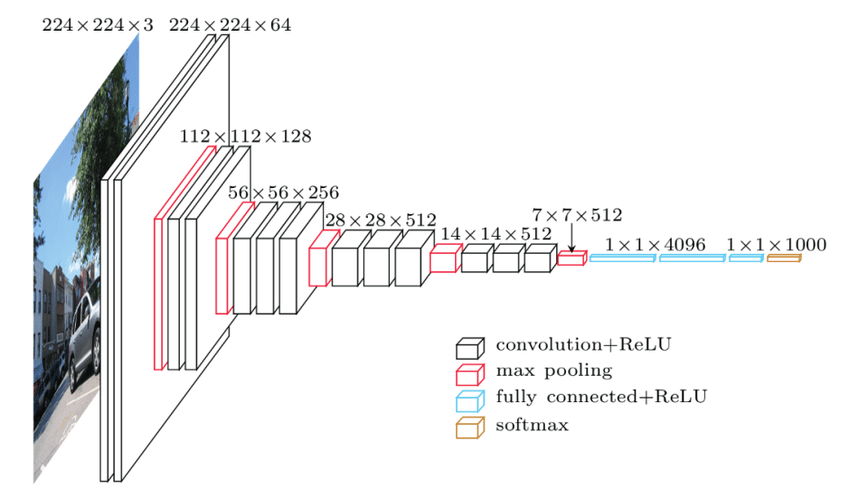

VGG16 neural network architecture (Source: ResearchGate)
https://www.researchgate.net/profile/Timea-Bezdan/publication/333242381/figure/fig2/AS:760979981860866@1558443174380/VGGNet-architecture-19.ppm


In [1]:
from IPython.display import Image
display(Image(filename='./images/vgg16_architecture.png'))
print(f"VGG16 neural network architecture (Source: ResearchGate)")
print("https://www.researchgate.net/profile/Timea-Bezdan/publication/333242381/figure/fig2/AS:760979981860866@1558443174380/VGGNet-architecture-19.ppm")

<h5 style="color:lightgreen;"><strong>Model Setup</strong></h5>
<br>
In this step, the model is initialised by declaring the hardware, model architecture to be used, as well as the tools required for logging and optimising the model. 

* **Hardware Utilization:** For this first model, the VGG16 was trained on an **NVIDIA RTX A4500**. This GPU provided the necessary computational power to effectively handle the training of the large HAM10000 dataset with augmentations. Overall, total training time ended at 130 epochs which took around **~90 minutes**.

* **Early Stopping Implementation:** Early stopping, set at 30 epochs of no improvement, stopped the training process at 130 epochs. This mechanism is critical to prevent overfitting and ensures that the model generalises well on any unseen data. As stated above, the total training time of this model took around 90 minutes on a NVIDIA RTX A4500.

* **Model Architecture:** The model used in this method is the VGG16 architecture, a well-known deep learning model in the field of computer vision. VGG16 is known for it's deep architecture and its effectiveness at extracting complex features in computer vision tasks. In our model, the model is taken as the pretrained model on ImageNet, which provides a solid foundation of learned images already to our neural network.

* **Modification of the Classifier Layer:** The classifier layer of the VGG16 model is modified to suit our specific task of classifying skin lesions. The original classifier is replaced with a new linear layer with an output size of 7, corresponding to the number of classes in the HAM10000 dataset.

* **Loss Function and Optimizer:** The Cross-Entropy Loss function is used for our training, as it is well-suited for multi-class classification problems. The Adam optimizer is selected for its efficiency in updating network weights, with a default weight decay parameter set to 0.0001 to help prevent overfitting.

* **Training and Validation Loops:** During training, the model learns to classify the images by minimising the loss of the training dataset, while validation is performed to evaluate the model's performance on unseen data. The use of Accuracy as a metric provides a clear indicator of the model's predictive capabilities.

* **Logging and Monitoring:** The TensorBoard writer has been utilided for logging training and validation losses, as well as accuracies. This helps our provide a visual and quantitative way to monitor the model's performance as it is training throughout the process in the form of outputs. This tool is invaluable for tracking progress and making informed decisions about model adjustments.

* **Early Stopping for Optimal Performance:** The implementation of early stopping based on validation loss is a critical feature to ensure the model does not overfit and performs optimally. This strategy saves computational resources and time by stopping training once the model ceases to show improvement after 30 epochs, and was initialised and explained in the section above in preprocessing.

* **Model Checkpointing:** The best model is saved during training, allowing for the retrieval of the most effective version of the model for future predictions or analysis.


<table align="center">
  <tr>
    <th>Hyperparameter</th>
    <th>Value</th>
  </tr>
  <tr>
    <td>Batch Size</td>
    <td>128 images</td>
  </tr>
  <tr>
    <td>Learning Rate</td>
    <td>0.0001</td>
  </tr>
  <tr>
    <td>Image Size</td>
    <td>224 x 224</td>
  </tr>
  <tr>
    <td>Decay Factor</td>
    <td>0.3</td>
  </tr>
  <tr>
    <td>Patience</td>
    <td>30 epochs</td>
  </tr>
  <tr>
    <td>Optimiser</td>
    <td>ADAM</td>
  </tr>
  <tr>
    <td>Total Training</td>
    <td>Up to 400 epochs</td>
  </tr>
</table>

In [21]:
!nvidia-smi
torch.cuda.is_available()

Fri Nov 10 02:59:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 520.61.05    Driver Version: 520.61.05    CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA RTX A4500    On   | 00000000:01:00.0 Off |                  Off |
| 30%   34C    P8    15W / 200W |    189MiB / 20470MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

In [22]:
torch.cuda.empty_cache()

In [23]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = torchvision.models.vgg16(pretrained=True).to(device)

model.classifier[6] = nn.Linear(4096, 7).to(device)

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), weight_decay=0.0001)

epochs = 400 # 200 or 250 or 300

writer = SummaryWriter(log_dir='skin_logs/', filename_suffix="skin50")

/home/administrator/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/administrator/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<h5 style="color:lightgreen;"><strong>Training the Model</strong></h5>

In [25]:
early_stopping = EarlyStopping(patience=30, verbose=True)

for epoch in range(epochs):
    train_loss = 0.00
    val_loss = 0.00
    train_accuracy = Accuracy()
    val_accuracy = Accuracy()
    print(f'Epoch {epoch+1}')

    # Training loop
    for idx, (inputs, labels) in enumerate(Bar(train_loader)):
        model.train()
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad() 
        outputs = model(inputs) 
        loss = criterion(outputs, labels)
        loss.backward() 
        optimizer.step() 
        train_loss += loss.item()
        train_accuracy.update((nn.functional.softmax(outputs, dim=1), labels))
    print(f"Train Accuracy: {train_accuracy.compute()}")
    train_loss /= len(train_loader)
    train_loss_formated = "{:.4f}".format(train_loss)

    # Validation loop
    with torch.no_grad():
        for inputs, labels in val_loader:
            model.eval()           
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_accuracy.update((nn.functional.softmax(outputs, dim=1), labels))
    print(f"Val Accuracy: {val_accuracy.compute()}")
    val_loss /= len(val_loader)
    val_loss_formated = "{:.4f}".format(val_loss)
    print(f'Training Loss: {train_loss_formated}')
    print(f"Validation Loss: {val_loss_formated}")

    # TensorBoard writer 
    writer.add_scalar('Loss/train', train_loss, epoch+1)
    writer.add_scalar('Loss/val', val_loss, epoch+1)
    writer.add_scalar('Accuracy/train', train_accuracy.compute(), epoch+1)
    writer.add_scalar('Accuracy/val', val_accuracy.compute(), epoch+1)

    # Early Stopping
    early_stopping(val_loss, model)       
    if early_stopping.early_stop:
        print("Early stopping")
        break
        
# load the last checkpoint with the best model
model.load_state_dict(torch.load('skin_models/skinmodel50.pt'))

Epoch 1
5973/5973: [===============================>] - ETA 2.3sss
Train Accuracy: 0.6842457726435627
Val Accuracy: 0.7221108884435538
Training Loss: 1.3735
Validation Loss: 0.8412
Monitored metric has improved (inf --> 0.841238).  Saving model ...
Epoch 2
5973/5973: [===============================>] - ETA 1.3ss
Train Accuracy: 0.7264356269881131
Val Accuracy: 0.7381429525718103
Training Loss: 0.8409
Validation Loss: 0.7908
Monitored metric has improved (0.841238 --> 0.790774).  Saving model ...
Epoch 3
5973/5973: [===============================>] - ETA 1.1ss
Train Accuracy: 0.7324627490373347
Val Accuracy: 0.7394789579158316
Training Loss: 0.8131
Validation Loss: 0.7815
Monitored metric has improved (0.790774 --> 0.781467).  Saving model ...
Epoch 4
5973/5973: [===============================>] - ETA 1.1ss
Train Accuracy: 0.7393269713711703
Val Accuracy: 0.7434869739478958
Training Loss: 0.7621
Validation Loss: 0.7200
Monitored metric has improved (0.781467 --> 0.720022).  Saving mo

<All keys matched successfully>

              precision    recall  f1-score   support

         MEL       0.57      0.28      0.38       123
          NV       0.90      0.96      0.92      1081
         BCC       0.64      0.79      0.71        66
       AKIEC       0.46      0.54      0.50        46
         BKL       0.66      0.58      0.62       146
          DF       0.25      0.07      0.11        15
        VASC       0.88      0.75      0.81        20

    accuracy                           0.83      1497
   macro avg       0.62      0.57      0.58      1497
weighted avg       0.82      0.83      0.82      1497

AUC of class MEL = 0.9005100531354657
AUC of class NV = 0.9543224756279799
AUC of class BCC = 0.981714418821337
AUC of class AKIEC = 0.9601474245647679
AUC of class BKL = 0.9455248775640571
AUC of class DF = 0.9240665766981557
AUC of class VASC = 0.9952945159106297


/tmp/ipykernel_69352/208948853.py:41: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  lbllist_one_hot = nn.functional.one_hot(torch.tensor([lbllist]), num_classes=num_classes)


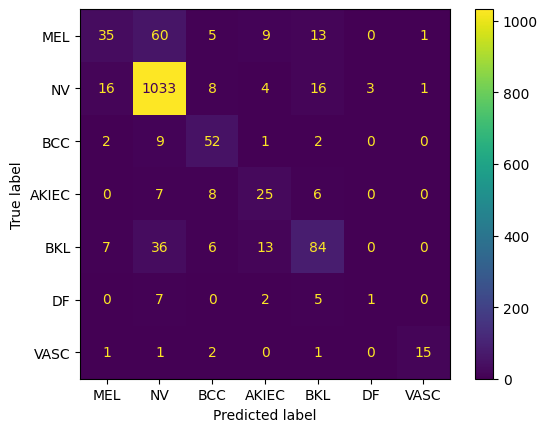

In [26]:
# Set the number of classes to 7 (the number of skin conditions)
num_classes = 7

# Initialise empty tensors to store the predictions and labels
predlist = torch.zeros(0,dtype=torch.long, device='cpu')
lbllist = torch.zeros(0,dtype=torch.long, device='cpu')
predlistauc = torch.zeros(0,dtype=torch.long, device='cpu')

# Evaluate the model on the validation set
with torch.no_grad():

    # Loop over each batch in the validation set
    for i, (inputs, classes) in enumerate(val_loader):

        # Set model to evaluation mode
        model.eval()

        # Move inputs and classes to device
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        # Append batch prediction results
        predlist=torch.cat([predlist,preds.view(-1).cpu()])
        lbllist=torch.cat([lbllist,classes.view(-1).cpu()])

        # Apply softmax to the outputs
        predlistauc = torch.cat([predlistauc,nn.functional.softmax(outputs, dim=1).cpu()])

# Convert predictions and labels to numpy arrays
predlist = predlist.numpy()
lbllist = lbllist.numpy()
predlistauc = predlistauc.numpy()

# Confusion matrix, classification report and AUC
conf_mat=confusion_matrix(lbllist, predlist)
target_names = ['MEL','NV','BCC','AKIEC','BKL','DF','VASC',]
ConfusionMatrixDisplay(conf_mat, display_labels=target_names).plot(values_format="d")
print(classification_report(lbllist, predlist, target_names=target_names))
lbllist_one_hot = nn.functional.one_hot(torch.tensor([lbllist]), num_classes=num_classes)
every_auc = roc_auc_score(lbllist_one_hot.view([predlistauc.shape[0], predlistauc.shape[1]]), 
                                          predlistauc, multi_class='ovr', average=None)

# Print the AUC for each class
for i, every in enumerate(target_names):
    print(f'AUC of class {every} = {every_auc[i]}')

<h5 style="color:lightgreen;"><strong>Training with Better Robustness</strong></h5>
We plan to make spin validation dataset with random rotations and horizontal flip and then check the metrics again.

In [27]:
val_transforms = transforms.Compose([
    transforms.Resize((224, 280)),
    torchvision.transforms.CenterCrop((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomApply(transforms=[transforms.RandomRotation(degrees=(-180, 180))], p=0.99),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])


val_dataset = datasets.ImageFolder(
    valdir, transform=val_transforms)

val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=64, shuffle=True,
    pin_memory=False, drop_last=False)

              precision    recall  f1-score   support

         MEL       0.57      0.25      0.34       615
          NV       0.89      0.95      0.92      5405
         BCC       0.67      0.75      0.71       330
       AKIEC       0.47      0.51      0.49       230
         BKL       0.64      0.62      0.63       730
          DF       0.09      0.03      0.04        75
        VASC       0.76      0.82      0.79       100

    accuracy                           0.83      7485
   macro avg       0.59      0.56      0.56      7485
weighted avg       0.81      0.83      0.81      7485

AUC of class MEL = 0.9049381664122318
AUC of class NV = 0.9529583096136057
AUC of class BCC = 0.9804739216059971
AUC of class AKIEC = 0.9520396727893807
AUC of class BKL = 0.9434799184774343
AUC of class DF = 0.9298533513270356
AUC of class VASC = 0.990070412999323


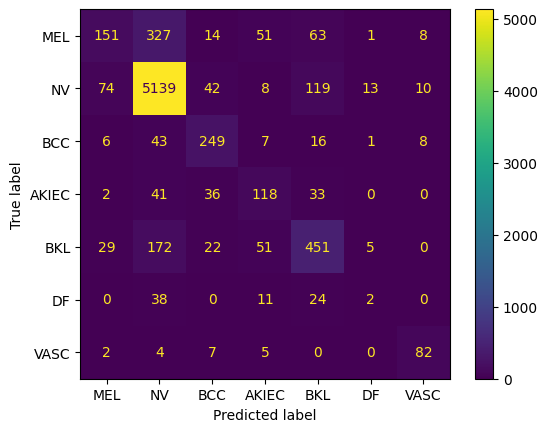

In [28]:
num_classes = 7

predlist=torch.zeros(0,dtype=torch.long, device='cpu')
lbllist=torch.zeros(0,dtype=torch.long, device='cpu')
predlistauc = torch.zeros(0,dtype=torch.long, device='cpu')
for n in range(5):
    with torch.no_grad():
        for i, (inputs, classes) in enumerate(val_loader):
            model.eval()
            inputs = inputs.to(device)
            classes = classes.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            # Append batch prediction results
            predlist=torch.cat([predlist,preds.view(-1).cpu()])
            lbllist=torch.cat([lbllist,classes.view(-1).cpu()])
            predlistauc = torch.cat([predlistauc,nn.functional.softmax(outputs, dim=1).cpu()])
predlist = predlist.numpy()
lbllist = lbllist.numpy()
predlistauc = predlistauc.numpy() 

# Confusion matrix, classification report and AUC
conf_mat=confusion_matrix(lbllist, predlist)
target_names = ['MEL','NV','BCC','AKIEC','BKL','DF','VASC',]
ConfusionMatrixDisplay(conf_mat, display_labels=target_names).plot(values_format="d")
print(classification_report(lbllist, predlist, target_names=target_names))
lbllist_one_hot = nn.functional.one_hot(torch.tensor([lbllist]), num_classes=num_classes)
every_auc = roc_auc_score(lbllist_one_hot.view([predlistauc.shape[0], predlistauc.shape[1]]), 
                                          predlistauc, multi_class='ovr', average=None)
for i, every in enumerate(target_names):
    print(f'AUC of class {every} = {every_auc[i]}')

---
### <h3 style="color:deeppink;"><strong>Model 2: ResNet50</strong></h3>
---
*Code by:*
- Name: Andar Sitohang
- zid: z5424491

### Step 1: Import Module

In [1]:
# Import Module
import numpy as np 
from tqdm import tqdm
import pandas as pd 
import os

import torch
import os
import random
import torchvision
import pandas as pd
import torch.nn as nn
import numpy as np
from torchvision import transforms, datasets
from shutil import copyfile, move
from torch.utils.tensorboard import SummaryWriter
from barbar import Bar
from torchsummary import summary
from ignite.metrics import Accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score

### Step 2: Read the raw data

In [2]:
# list all files and directories
os.listdir('data')

['HAM10000_images_part_1', 'HAM10000_images_part_2', 'HAM10000_metadata.csv']

In [3]:
# load the metadata
data = pd.read_csv('data/HAM10000_metadata.csv')

In [4]:
# data is the DataFrame containing metadata from the CSV file
data['dx'].value_counts()

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

In [5]:
# find out the unique number of classes
data['dx'].nunique()

7

### Step 3: Create a function to split into train and validation

In [6]:
# split data into 4 parameters: source, training, validation, and split_size
def split_data(source, training, validation, split_size):
    # initiate an empty list
    files = []
    
    for filename in os.listdir(source):
        file = source + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * split_size)
    validation_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    validation_set = shuffled_set[:validation_length]

    for filename in training_set:
        this_file = source + filename
        destination = training + filename
        copyfile(this_file, destination)

    for filename in validation_set:
        this_file = source + filename
        destination = validation + filename
        copyfile(this_file, destination)

### Step 4: Create folders and store the train/validation for each class

In [7]:
try:
    os.mkdir('skin_models/')
    os.mkdir('HAM10000')
    os.mkdir('orig/')
    os.mkdir('orig/0.MEL/')
    os.mkdir('orig/1.NV/')
    os.mkdir('orig/2.BCC/')
    os.mkdir('orig/3.AKIEC/')
    os.mkdir('orig/4.BKL/')
    os.mkdir('orig/5.DF/')
    os.mkdir('orig/6.VASC/')

    os.mkdir('skin/')
    os.mkdir('skin/training/')
    os.mkdir('skin/validation/')
    os.mkdir('skin/training/0.MEL/')
    os.mkdir('skin/training/1.NV/')
    os.mkdir('skin/training/2.BCC/')
    os.mkdir('skin/training/3.AKIEC/')
    os.mkdir('skin/training/4.BKL/')
    os.mkdir('skin/training/5.DF/')
    os.mkdir('skin/training/6.VASC/')
    os.mkdir('skin/validation/0.MEL/')
    os.mkdir('skin/validation/1.NV/')
    os.mkdir('skin/validation/2.BCC/')
    os.mkdir('skin/validation/3.AKIEC/')
    os.mkdir('skin/validation/4.BKL/')
    os.mkdir('skin/validation/5.DF/')
    os.mkdir('skin/validation/6.VASC/')
except:
    print('Folders already created.')

In [8]:
orig_all = 'HAM10000/'
source_MEL = 'orig/0.MEL/'
source_NV = 'orig/1.NV/'
source_BCC = 'orig/2.BCC/'
source_AKIEC = 'orig/3.AKIEC/'
source_BKL = 'orig/4.BKL/'
source_DF = 'orig/5.DF/'
source_VASC = 'orig/6.VASC/'

training_MEL = 'skin/training/0.MEL/'
training_NV = 'skin/training/1.NV/'
training_BCC = 'skin/training/2.BCC/'
training_AKIEC = 'skin/training/3.AKIEC/'
training_BKL = 'skin/training/4.BKL/'
training_DF = 'skin/training/5.DF/'
training_VASC = 'skin/training/6.VASC/'
validation_MEL = 'skin/validation/0.MEL/'
validation_NV = 'skin/validation/1.NV/'
validation_BCC = 'skin/validation/2.BCC/'
validation_AKIEC = 'skin/validation/3.AKIEC/'
validation_BKL = 'skin/validation/4.BKL/'
validation_DF = 'skin/validation/5.DF/'
validation_VASC = 'skin/validation/6.VASC/'

In [9]:
part1 = "data/HAM10000_images_part_1"
part2 = "data/HAM10000_images_part_2"

for part in [part1,part2]:
    for img in tqdm(os.listdir(part)):
        copyfile(os.path.join(part, img), os.path.join('HAM10000', img))

100%|█████████████████████████████████████████████████████████████████████████████| 5015/5015 [00:07<00:00, 711.33it/s]


In [10]:
data

lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]

In [11]:
data.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')

In [12]:
len(data)

10015

### Step 5: Drop the duplicates images

In [13]:
# drop all duplicate photos by lesion_id to make all our photos iid (independant and identically distributed), 
# so that we wont overfit

data = data.drop_duplicates(subset='lesion_id')

In [14]:
len(data)

7470

In [15]:
image_names = [x for x in data['image_id']]
diagnosis = [x for x in data['dx']]

In [16]:
print(len(image_names))
print(len(diagnosis))

7470
7470


In [17]:
print(image_names[0])
print(diagnosis[0])

ISIC_0027419
bkl


In [18]:
pd.unique(data['dx'])

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

### Step 6: Copy image to their particular locations

In [19]:
for index, image in tqdm(enumerate(image_names)):
    image = image + '.jpg'
    if diagnosis[index] == 'mel':
        copyfile(os.path.join(orig_all, image), os.path.join(source_MEL, image))
    elif diagnosis[index] == 'nv':
        copyfile(os.path.join(orig_all, image), os.path.join(source_NV, image))
    elif diagnosis[index] == 'bcc': 
        copyfile(os.path.join(orig_all, image), os.path.join(source_BCC, image))
    elif diagnosis[index] == 'akiec': 
        copyfile(os.path.join(orig_all, image), os.path.join(source_AKIEC, image))
    elif diagnosis[index] == 'bkl':
        copyfile(os.path.join(orig_all, image), os.path.join(source_BKL, image))
    elif diagnosis[index] == 'df':  
        copyfile(os.path.join(orig_all, image), os.path.join(source_DF, image))
    elif diagnosis[index] == 'vasc': 
        copyfile(os.path.join(orig_all, image), os.path.join(source_VASC, image))       

7470it [00:29, 252.35it/s]


In [20]:
# Print amount of pictures for each class
print(len(os.listdir(source_MEL)))
print(len(os.listdir(source_NV)))
print(len(os.listdir(source_BCC)))
print(len(os.listdir(source_AKIEC)))
print(len(os.listdir(source_BKL)))
print(len(os.listdir(source_DF)))
print(len(os.listdir(source_VASC)))

614
5403
327
228
727
73
98


In [21]:
# split each individual class of photos into train and val datasets 80/20%
# 80% of the data will be used for the training set, and 20% of the data will be used for the validation set.

split_size = 0.8
split_data(source_MEL, training_MEL, validation_MEL, split_size)
split_data(source_NV, training_NV, validation_NV, split_size)
split_data(source_BCC, training_BCC, validation_BCC, split_size)
split_data(source_AKIEC, training_AKIEC, validation_AKIEC, split_size)
split_data(source_BKL, training_BKL, validation_BKL, split_size)
split_data(source_DF, training_DF, validation_DF, split_size)
split_data(source_VASC, training_VASC, validation_VASC, split_size)

In [22]:
# Print amount of pictures for each class after split, train/val.
print(len(os.listdir(training_MEL)))
print(len(os.listdir(validation_MEL)))
print(len(os.listdir(training_NV)))
print(len(os.listdir(validation_NV)))
print(len(os.listdir(training_BCC)))
print(len(os.listdir(validation_BCC)))
print(len(os.listdir(training_AKIEC)))
print(len(os.listdir(validation_AKIEC)))
print(len(os.listdir(training_BKL)))
print(len(os.listdir(validation_BKL)))
print(len(os.listdir(training_DF)))
print(len(os.listdir(validation_DF)))
print(len(os.listdir(training_VASC)))
print(len(os.listdir(validation_VASC)))

491
123
4322
1081
261
66
182
46
581
146
58
15
78
20


Inherent regularization of ResNet50 due to its Bottleneck layers and Batch normalization together with weight decay and random data augmentations is enough to prevent model from overfitting even on this imbalance dataset

In [23]:
# put path for training and validation data
traindir = r'skin/training/'
valdir = r'skin/validation/'

### Step 7: Data Augmentation
Data Augmentation is a technique to increase the diversity in training set by applying random (but realistic) transformations.

#### Challenge:
The dataset consists of 7470 unique skin neoplasm photos with height=450 and width=600 pixels.
- After analyzing the images, we observed that in most cases, the skin neoplasm is positioned at the center and occupies the central 450x450 portion of the image, with only a few exceptions. Therefore, we conclude that there is no need to compress the photos along the width axis, which might result in the loss of important details, as our primary subject of interest is nearly always within the central crop. Therefore for Resnet-50 to work, need to make it 240x240.

#### How we do it:
- Resnet-50 requires input images to be of size 224 × 224, we will first resize to 224x280 to avoid loss of info on width axis and then crop to 224x224 piece.
- Apply Random rotation and Horizontal/Vertical flipping. Since skin neoplasms can be in a lot of different shapes, by rotating and horizontally flipping them we will still get skin neoplasms that we would expect our model to classify correctly. These two transformations will help our model greatly. They will inflate our dataset, increase model robustness (especially since we have some classes with very small representation), help with better generalization and overfitting prevention.

In [26]:
train_transforms = transforms.Compose([
    # resize image to 224 x 280 for training data
    transforms.Resize((224, 280)),
    # crop the center part to make it 224 x 224
    transforms.CenterCrop((224, 224)),
    # random horizontal flip with 50% probability
    transforms.RandomHorizontalFlip(p=0.5),
    # random rotate the image between -180 and 180 degrees, with a probability 99%
    transforms.RandomApply(transforms=[transforms.RandomRotation(degrees=(-180, 180))], p=0.99),
    # convert the image to a PyTorch sensor
    transforms.ToTensor(),
    # normalizes the tensor image with mean and standard deviation value
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

val_transforms = transforms.Compose([
    # resize image to 224 x 280 for validation data
    transforms.Resize((224, 280)),
    # crop the center part to make it 224 x 224
    torchvision.transforms.CenterCrop((224, 224)),
    # convert the image to a PyTorch sensor
    transforms.ToTensor(),
    # normalize the tensor image with mean and standard deviation value
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

# create a training dataset from images in the traindir directory
train_dataset = datasets.ImageFolder(
    traindir, transform=train_transforms)

# create a validation dataset from images in the valdir directory
val_dataset = datasets.ImageFolder(
    valdir, transform=val_transforms)

In [27]:
# create DataLoader objects for both of training and validation dataset in PyTorch
# in each iteration, DataLoader will provide batch of 64 images from the training dataset
# set shuffle as True value to avoid any order specific biases

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=64, shuffle=True,
    pin_memory=False, drop_last=False)

val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=64, shuffle=True,
    pin_memory=False, drop_last=False)

In [28]:
# create DataLoader objects for both of training and validation dataset in PyTorch
# in each iteration, DataLoader will provide batch of 64 images from the training dataset
# set shuffle as True value to avoid any order specific biases

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=64, shuffle=True,
    pin_memory=False, drop_last=False)

val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=64, shuffle=True,
    pin_memory=False, drop_last=False)

In [29]:
print(val_dataset.class_to_idx)
print(train_dataset.class_to_idx)

{'0.MEL': 0, '1.NV': 1, '2.BCC': 2, '3.AKIEC': 3, '4.BKL': 4, '5.DF': 5, '6.VASC': 6}
{'0.MEL': 0, '1.NV': 1, '2.BCC': 2, '3.AKIEC': 3, '4.BKL': 4, '5.DF': 5, '6.VASC': 6}


### Step 8: Use ResNet50 method
Sets up a deep learning model for image classification using PyTorch

In [31]:
# model and data should be moved to GPU for faster computation
device = 'cuda'

# load a pre-trained ResNet-50 model from torchvision library, and then moves the model to the specified GPU
# model = torchvision.models.resnet50(pretrained=True).to(device)
model = torchvision.models.resnet50(weights=torchvision.models.ResNet50_Weights.DEFAULT).to(device)

# replaces the final fully connected layer of the ResNet-50 model with a new linear layer
# the new layer has an input feature size of 2048, and output feature size of 7 (number of classes in classification task)
model.fc = nn.Linear(2048, 7).to(device)

# use CrossEntropyLoss that common for multi-class classification tasks
criterion = nn.CrossEntropyLoss()

# use and Adam Optimizer for training the model, applying a weight decay of 0.0001 to prevent overfitting.
optimizer = torch.optim.Adam(model.parameters(), weight_decay=0.0001)

# set the number of training epochs to 250.
epochs = 30 # 5 # 200 or 250 or 300

# use TensorBoardSummary for logging. This common for monitoring the training process, and visualizing metrics.
# the log will be stored in the directory skin_logs with suffix "skin50" in filename
writer = SummaryWriter(log_dir='skin_logs/', filename_suffix="skin50")

In [32]:
# Shows summary of ResNet-50 model
# model expects input images of size 224 x 224 pixels with 3 color channels (RGB)
summary(model, input_size=(3, 224, 224))

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            9,408
├─BatchNorm2d: 1-2                       128
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
|    └─Bottleneck: 2-1                   --
|    |    └─Conv2d: 3-1                  4,096
|    |    └─BatchNorm2d: 3-2             128
|    |    └─Conv2d: 3-3                  36,864
|    |    └─BatchNorm2d: 3-4             128
|    |    └─Conv2d: 3-5                  16,384
|    |    └─BatchNorm2d: 3-6             512
|    |    └─ReLU: 3-7                    --
|    |    └─Sequential: 3-8              16,896
|    └─Bottleneck: 2-2                   --
|    |    └─Conv2d: 3-9                  16,384
|    |    └─BatchNorm2d: 3-10            128
|    |    └─Conv2d: 3-11                 36,864
|    |    └─BatchNorm2d: 3-12            128
|    |    └─Conv2d: 3-13                 16,384
|    |    └─BatchNorm2d: 3-14      

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            9,408
├─BatchNorm2d: 1-2                       128
├─ReLU: 1-3                              --
├─MaxPool2d: 1-4                         --
├─Sequential: 1-5                        --
|    └─Bottleneck: 2-1                   --
|    |    └─Conv2d: 3-1                  4,096
|    |    └─BatchNorm2d: 3-2             128
|    |    └─Conv2d: 3-3                  36,864
|    |    └─BatchNorm2d: 3-4             128
|    |    └─Conv2d: 3-5                  16,384
|    |    └─BatchNorm2d: 3-6             512
|    |    └─ReLU: 3-7                    --
|    |    └─Sequential: 3-8              16,896
|    └─Bottleneck: 2-2                   --
|    |    └─Conv2d: 3-9                  16,384
|    |    └─BatchNorm2d: 3-10            128
|    |    └─Conv2d: 3-11                 36,864
|    |    └─BatchNorm2d: 3-12            128
|    |    └─Conv2d: 3-13                 16,384
|    |    └─BatchNorm2d: 3-14      

### Step 9: Define a class to early stops the training if validation loss does not improve after a given patience.

In [33]:
# we use the earlystopping class that common used in training neural networks to prevent overfitting
# the class monitor the validation loss during training, and will be stop the training process if the loss does not improve for a give number of epochs
# patience is the number of epochs to wait for an improvement in the validation loss before stopping the training.

class EarlyStopping:
    def __init__(self, patience=10, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0          # increment without improvement
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func

# this function called after each epoch done. If there is improvement in the validation loss, it resets the counter and saves the model checkpoint
# if the validation loss is not improve, it increments the counter
# if the counter reaches the patience limit, it sets the early_stop flag to True, indicates the training should be stopped.
    
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when monitored metric decrease.'''
        if self.verbose:
            self.trace_func(f'Monitored metric has improved ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), f'skin_models/skinmodel50.pt') 
        self.val_loss_min = val_loss


### Step 10: Train the Model

In [34]:
# the number of patience = 10, it means if there is no improvement in validation_loss during 30 epochs, the training will be stop.
early_stopping = EarlyStopping(patience=10, verbose=True)

for epoch in range(epochs):
    train_loss = 0.00
    val_loss = 0.00
    train_accuracy = Accuracy()
    val_accuracy = Accuracy()
    print(f'Epoch {epoch+1}')

    # Training loop
    for idx, (inputs, labels) in enumerate(Bar(train_loader)):
        model.train()
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad() 
        outputs = model(inputs) 
        loss = criterion(outputs, labels)
        loss.backward() 
        optimizer.step() 
        train_loss += loss.item()
        train_accuracy.update((nn.functional.softmax(outputs, dim=1), labels))
    print(f"Train Accuracy: {train_accuracy.compute()}")
    train_loss /= len(train_loader)
    train_loss_formated = "{:.4f}".format(train_loss)

    # Validation loop
    with torch.no_grad():
        for inputs, labels in val_loader:
            model.eval()           
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_accuracy.update((nn.functional.softmax(outputs, dim=1), labels))
    print(f"Val Accuracy: {val_accuracy.compute()}")
    val_loss /= len(val_loader)
    val_loss_formated = "{:.4f}".format(val_loss)
    print(f'Training Loss: {train_loss_formated}')
    print(f"Validation Loss: {val_loss_formated}")

    # TensorBoard writer 
    writer.add_scalar('Loss/train', train_loss, epoch+1)
    writer.add_scalar('Loss/val', val_loss, epoch+1)
    writer.add_scalar('Accuracy/train', train_accuracy.compute(), epoch+1)
    writer.add_scalar('Accuracy/val', val_accuracy.compute(), epoch+1)

    # Early Stopping
    early_stopping(val_loss, model)       
    if early_stopping.early_stop:
        print("Early stopping")
        break
        
# load the last checkpoint with the best model
model.load_state_dict(torch.load('skin_models/skinmodel50.pt'))

Epoch 1
5973/5973: [===============================>] - ETA 2.3sss
Train Accuracy: 0.7642725598526704
Val Accuracy: 0.7849031396125584
Training Loss: 0.6660
Validation Loss: 0.6893
Monitored metric has improved (inf --> 0.689303).  Saving model ...
Epoch 2
5973/5973: [===============================>] - ETA 1.2sss
Train Accuracy: 0.8153356772141302
Val Accuracy: 0.8323313293253173
Training Loss: 0.5302
Validation Loss: 0.4478
Monitored metric has improved (0.689303 --> 0.447814).  Saving model ...
Epoch 3
5973/5973: [===============================>] - ETA 1.2sss
Train Accuracy: 0.8305709023941068
Val Accuracy: 0.8162992651970608
Training Loss: 0.4779
Validation Loss: 0.5458
EarlyStopping counter: 1 out of 10
Epoch 4
5973/5973: [===============================>] - ETA 1.2sss
Train Accuracy: 0.8399464255817847
Val Accuracy: 0.8022712090848363
Training Loss: 0.4371
Validation Loss: 0.7462
EarlyStopping counter: 2 out of 10
Epoch 5
5973/5973: [===============================>] - ETA 1.2ss

<All keys matched successfully>

              precision    recall  f1-score   support

         MEL       0.71      0.73      0.72       123
          NV       0.95      0.98      0.96      1081
         BCC       0.85      0.92      0.88        66
       AKIEC       0.96      0.57      0.71        46
         BKL       0.81      0.71      0.76       146
          DF       1.00      0.60      0.75        15
        VASC       1.00      1.00      1.00        20

    accuracy                           0.91      1497
   macro avg       0.90      0.79      0.83      1497
weighted avg       0.91      0.91      0.91      1497

AUC of class MEL = 0.9746807730086035
AUC of class NV = 0.9858882445029531
AUC of class BCC = 0.9976388624187367
AUC of class AKIEC = 0.9927336469601175
AUC of class BKL = 0.981196069882279
AUC of class DF = 0.9983805668016195
AUC of class VASC = 1.0


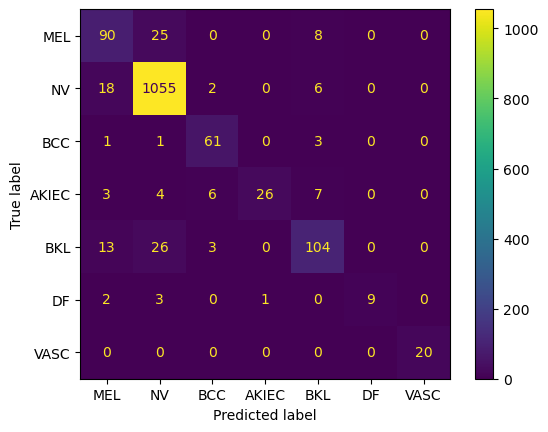

In [36]:
num_classes = 7

predlist = torch.zeros(0,dtype=torch.long, device='cpu')
lbllist = torch.zeros(0,dtype=torch.long, device='cpu')
predlistauc = torch.zeros(0,dtype=torch.long, device='cpu')
with torch.no_grad():
    for i, (inputs, classes) in enumerate(val_loader):
        model.eval()
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        # Append batch prediction results
        predlist=torch.cat([predlist,preds.view(-1).cpu()])
        lbllist=torch.cat([lbllist,classes.view(-1).cpu()])
        predlistauc = torch.cat([predlistauc,nn.functional.softmax(outputs, dim=1).cpu()])
predlist = predlist.numpy()
lbllist = lbllist.numpy()
predlistauc = predlistauc.numpy()

# Confusion matrix, classification report and AUC
conf_mat=confusion_matrix(lbllist, predlist)
target_names = ['MEL','NV','BCC','AKIEC','BKL','DF','VASC',]
ConfusionMatrixDisplay(conf_mat, display_labels=target_names).plot(values_format="d")

# Use zero_division=0 to handle labels with no predicted samples
print(classification_report(lbllist, predlist, target_names=target_names, zero_division=0))

# Convert list of numpy arrays to a single numpy array before creating a tensor
lbllist_one_hot = nn.functional.one_hot(torch.tensor(np.array(lbllist)), num_classes=num_classes)


every_auc = roc_auc_score(lbllist_one_hot.view([predlistauc.shape[0], predlistauc.shape[1]]), 
                                          predlistauc, multi_class='ovr', average=None)
for i, every in enumerate(target_names):
    print(f'AUC of class {every} = {every_auc[i]}')

### Step 11: Grad-Cam

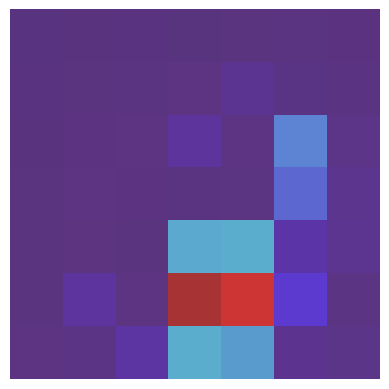

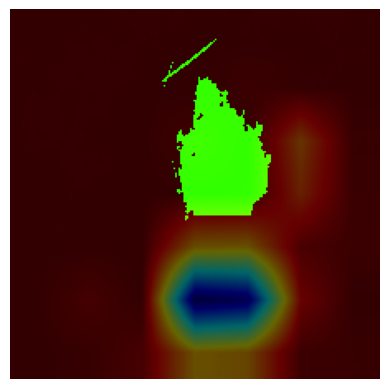

In [39]:
import torch
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load the pre-trained ResNet model
model.eval()

# Define a function to get the Grad-CAM
class GradCAM:
    def __init__(self, model):
        self.model = model.cpu()
        self.feature_maps = None
        self.grads = None
        self.hooks = []

        # Register hooks to capture feature maps and gradients
        self.hooks.append(self.model.layer4.register_forward_hook(self.save_feature_maps))
        self.hooks.append(self.model.layer4.register_backward_hook(self.save_gradients))

    def save_feature_maps(self, module, input, output):
        self.feature_maps = output

    def save_gradients(self, module, grad_input, grad_output):
        self.grads = grad_output[0]

    def get_gradients(self, target_layer):
        for hook in self.hooks:
            hook.remove()

        self.hooks = []
        self.hooks.append(target_layer.register_backward_hook(self.save_gradients))

    def generate(self, input_image, target_class):
        self.model.zero_grad()
        output = self.model(input_image)
        score = output[0, target_class]
        score.backward()

        pooled_gradients = torch.mean(self.grads, dim=[2, 3], keepdim=True)
        activations = self.feature_maps

        weighted_activations = torch.mean(pooled_gradients * activations, dim=1).squeeze()
        heatmap = torch.clamp(weighted_activations, min=0)
        heatmap /= torch.max(heatmap)

        return heatmap.detach().numpy()

# Load and preprocess the image
def preprocess_image(image_path):
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = Image.open(image_path).convert('RGB')
    image = preprocess(image).unsqueeze(0)
    return image

image_path = './data/HAM10000_images_part_1/ISIC_0024306.jpg'
input_image = preprocess_image(image_path)

# Initialize GradCAM and generate the heatmap
grad_cam = GradCAM(model)
heatmap = grad_cam.generate(input_image, target_class=0)  # Change the target_class as needed

# Plot the original image with the heatmap overlay
image = Image.open(image_path)
plt.imshow(image)
plt.imshow(heatmap, alpha=0.6, cmap='jet')
plt.axis('off')
plt.show()

# Resize heatmap to match the input image size
heatmap = cv2.resize(heatmap, (input_image.size(3), input_image.size(2)))

# Normalize the heatmap to range [0, 255]
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Convert PIL image to OpenCV format
image_cv = cv2.cvtColor(np.array(input_image.squeeze(0).permute(1, 2, 0)), cv2.COLOR_RGB2BGR)

# Overlay the heatmap onto the original image
superimposed_img = heatmap * 0.4 + image_cv  # Adjust the transparency (0.4) as needed
superimposed_img = np.minimum(superimposed_img, 255).astype(np.uint8)

# Display the overlaid image using Matplotlib in the Jupyter Notebook
plt.imshow(superimposed_img)
plt.axis('off')
plt.show()

### Step 12: Table Performance

In [41]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Assuming you have a model object and a test DataLoader
# model = YourModel()  # Replace with your model object
# test_loader = YourTestDataLoader()  # Replace with your test DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

# Define the path to your dataset
data_dir = './skin/validation'

# Define transformations for the images (modify as needed)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    torchvision.transforms.CenterCrop((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create a test dataset using ImageFolder
test_dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Define the test DataLoader
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

device = torch.device("cpu" if torch.cuda.is_available() else "cpu")

criterion = nn.CrossEntropyLoss()  # Assuming a classification task
num_classes = 7
model.to(device)
model.eval()

total_correct = 0
total_samples = 0
confusion_matrix = torch.zeros(num_classes, num_classes)  # Initialize with the number of classes

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()

        for t, p in zip(labels.view(-1), predicted.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1

accuracy = total_correct / total_samples
print(f'Accuracy: {accuracy:.4f}')

# Calculate precision, recall, and F1-score
true_positives = torch.diag(confusion_matrix)
false_positives = confusion_matrix.sum(dim=0) - true_positives
false_negatives = confusion_matrix.sum(dim=1) - true_positives

precision = torch.nan_to_num(true_positives / (true_positives + false_positives), nan=0.0)
recall = torch.nan_to_num(true_positives / (true_positives + false_negatives), nan=0.0)
f1_score = torch.nan_to_num(2 * (precision * recall) / (precision + recall), nan=0.0)

for i in range(num_classes):
    print(f'Class {i}: Precision={precision[i]:.4f}, Recall={recall[i]:.4f}, F1-score={f1_score[i]:.4f}')

# Display confusion matrix
print('Confusion Matrix:')
print(confusion_matrix)

Accuracy: 0.9105
Class 0: Precision=0.6940, Recall=0.7561, F1-score=0.7237
Class 1: Precision=0.9404, Recall=0.9787, F1-score=0.9592
Class 2: Precision=0.8611, Recall=0.9394, F1-score=0.8986
Class 3: Precision=1.0000, Recall=0.5217, F1-score=0.6857
Class 4: Precision=0.8596, Recall=0.6712, F1-score=0.7538
Class 5: Precision=1.0000, Recall=0.5333, F1-score=0.6957
Class 6: Precision=1.0000, Recall=1.0000, F1-score=1.0000
Confusion Matrix:
tensor([[9.3000e+01, 2.5000e+01, 2.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.9000e+01, 1.0580e+03, 0.0000e+00, 0.0000e+00, 4.0000e+00, 0.0000e+00,
         0.0000e+00],
        [0.0000e+00, 2.0000e+00, 6.2000e+01, 0.0000e+00, 2.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.0000e+00, 8.0000e+00, 4.0000e+00, 2.4000e+01, 7.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.6000e+01, 2.9000e+01, 3.0000e+00, 0.0000e+00, 9.8000e+01, 0.0000e+00,
         0.0000e+00],
        [3.0000e+00, 3.0000e+00, 1.0000e+00,

### Step 13: Table for parameters for ResNet50

In [42]:
import torch
import torchvision.models as models
import pandas as pd


# Function to count the number of parameters in the model
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Get the number of trainable parameters
num_params = count_parameters(model)

# Display the parameters in a table
parameters = []
for name, param in model.named_parameters():
    if param.requires_grad:
        parameters.append([name, param.numel()])

# Create a Pandas DataFrame from the parameters list
df = pd.DataFrame(parameters, columns=['Parameter', 'Number of Parameters'])

# Display the table
print("Total number of trainable parameters in the model:", num_params)
print(df)

Total number of trainable parameters in the model: 23522375
                 Parameter  Number of Parameters
0             conv1.weight                  9408
1               bn1.weight                    64
2                 bn1.bias                    64
3    layer1.0.conv1.weight                  4096
4      layer1.0.bn1.weight                    64
..                     ...                   ...
156  layer4.2.conv3.weight               1048576
157    layer4.2.bn3.weight                  2048
158      layer4.2.bn3.bias                  2048
159              fc.weight                 14336
160                fc.bias                     7

[161 rows x 2 columns]


#### Summary:
- In the end we were able to achieve 91% accuracy with 30 epochs, and AUCs close to 100%!
- We could see that even on 1 classes with smallest representations (only 78 images) we still were able to achieve high F1-Score with 100%.
- We believe that the most important reason for the perfect result is well chosen data augmentations that helped not only to enrich our dataset, but also prevent overfitting.

#### References:
- https://datagen.tech/guides/computer-vision/resnet-50/
- https://viso.ai/deep-learning/resnet-residual-neural-network/
- https://www.kaggle.com/code/pmigdal/transfer-learning-with-resnet-50-in-pytorch

---
### <h3 style="color:deeppink;"><strong>Model 3: Custom Model</strong></h3>
---

In [28]:
class PaperModel(nn.Module):
    # two convolutional layers and one fully connected layer,
    # all using relu, followed by log_softmax
    def __init__(self):
        super(PaperModel, self).__init__()
        self.init_channels = 16
        self.kernel_size = (6, 6)
        self.main_2d = nn.Sequential(
            nn.Conv2d(
                in_channels=3,
                out_channels=self.init_channels,
                kernel_size=self.kernel_size,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)),
            nn.Conv2d(
                in_channels=self.init_channels,
                out_channels=self.init_channels * 2,
                kernel_size=self.kernel_size,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)),
            nn.Conv2d(
                in_channels=self.init_channels * 2,
                out_channels=self.init_channels * 4,
                kernel_size=self.kernel_size,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)),
            nn.Conv2d(
                in_channels=self.init_channels * 4,
                out_channels=self.init_channels * 8,
                kernel_size=self.kernel_size,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)),
            nn.Conv2d(
                in_channels=self.init_channels * 8,
                out_channels=self.init_channels * 16,
                kernel_size=self.kernel_size,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2)),
        )
        self.main_1d = nn.Sequential(
            nn.Linear(in_features=256 * 4, out_features=512),
            nn.ReLU(),
            nn.Linear(in_features=512, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=7),
        )

    def forward(self, x):
        x = self.main_2d(x)
        x = torch.flatten(x, start_dim=1)
        x = self.main_1d(x)
        return x

In [29]:
device = 'cuda'

model = PaperModel().to(device)

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), weight_decay=0.0001)

epochs = 170

writer = SummaryWriter(log_dir='skin_logs/', filename_suffix="skin50")

In [30]:
# Shows info about model
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 219, 219]           1,744
              ReLU-2         [-1, 16, 219, 219]               0
         MaxPool2d-3         [-1, 16, 109, 109]               0
            Conv2d-4         [-1, 32, 104, 104]          18,464
              ReLU-5         [-1, 32, 104, 104]               0
         MaxPool2d-6           [-1, 32, 52, 52]               0
            Conv2d-7           [-1, 64, 47, 47]          73,792
              ReLU-8           [-1, 64, 47, 47]               0
         MaxPool2d-9           [-1, 64, 23, 23]               0
           Conv2d-10          [-1, 128, 18, 18]         295,040
             ReLU-11          [-1, 128, 18, 18]               0
        MaxPool2d-12            [-1, 128, 9, 9]               0
           Conv2d-13            [-1, 256, 4, 4]       1,179,904
             ReLU-14            [-1, 25

#### Step 9: Define a class to early stops the training if validation loss does not improve after a given patience.

In [31]:
class EarlyStopping:
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when monitored metric decrease.'''
        if self.verbose:
            self.trace_func(f'Monitored metric has improved ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), f'skin_models/papermodel.pt') 
        self.val_loss_min = val_loss


#### Step 10: Train the Model

In [32]:
early_stopping = EarlyStopping(patience=30, verbose=True)

for epoch in range(epochs):
    train_loss = 0.00
    val_loss = 0.00
    train_accuracy = Accuracy()
    val_accuracy = Accuracy()
    print(f'Epoch {epoch+1}')

    # Training loop
    for idx, (inputs, labels) in enumerate(Bar(train_loader)):
        model.train()
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad() 
        outputs = model(inputs) 
        loss = criterion(outputs, labels)
        loss.backward() 
        optimizer.step() 
        train_loss += loss.item()
        train_accuracy.update((nn.functional.softmax(outputs, dim=1), labels))
    print(f"Train Accuracy: {train_accuracy.compute()}")
    train_loss /= len(train_loader)
    train_loss_formated = "{:.4f}".format(train_loss)

    # Validation loop
    with torch.no_grad():
        for inputs, labels in val_loader:
            model.eval()           
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_accuracy.update((nn.functional.softmax(outputs, dim=1), labels))
    print(f"Val Accuracy: {val_accuracy.compute()}")
    val_loss /= len(val_loader)
    val_loss_formated = "{:.4f}".format(val_loss)
    print(f'Training Loss: {train_loss_formated}')
    print(f"Validation Loss: {val_loss_formated}")

    # TensorBoard writer 
    writer.add_scalar('Loss/train', train_loss, epoch+1)
    writer.add_scalar('Loss/val', val_loss, epoch+1)
    writer.add_scalar('Accuracy/train', train_accuracy.compute(), epoch+1)
    writer.add_scalar('Accuracy/val', val_accuracy.compute(), epoch+1)

    # Early Stopping
    early_stopping(val_loss, model)       
    if early_stopping.early_stop:
        print("Early stopping")
        break
        


Epoch 1
5973/5973: [===============================>] - ETA 0.4ss
Train Accuracy: 0.7157207433450528
Val Accuracy: 0.7221108884435538
Training Loss: 0.9775
Validation Loss: 0.9261
Monitored metric has improved (inf --> 0.926095).  Saving model ...
Epoch 2
5973/5973: [===============================>] - ETA 0.3ss
Train Accuracy: 0.7235894860204253
Val Accuracy: 0.7221108884435538
Training Loss: 0.8313
Validation Loss: 0.7876
Monitored metric has improved (0.926095 --> 0.787594).  Saving model ...
Epoch 3
5973/5973: [===============================>] - ETA 0.3ss
Train Accuracy: 0.7244265863050393
Val Accuracy: 0.7321309285237141
Training Loss: 0.8064
Validation Loss: 0.7709
Monitored metric has improved (0.787594 --> 0.770913).  Saving model ...
Epoch 4
5973/5973: [===============================>] - ETA 0.3ss
Train Accuracy: 0.7304537083542608
Val Accuracy: 0.7321309285237141
Training Loss: 0.7773
Validation Loss: 0.7658
Monitored metric has improved (0.770913 --> 0.765840).  Saving mod

In [33]:
# load the last checkpoint with the best model
model.load_state_dict(torch.load('skin_models/papermodel.pt'))

<All keys matched successfully>

              precision    recall  f1-score   support

         MEL       0.81      0.65      0.72       123
          NV       0.94      0.97      0.96      1081
         BCC       0.73      0.86      0.79        66
       AKIEC       0.61      0.74      0.67        46
         BKL       0.79      0.65      0.71       146
          DF       0.79      0.73      0.76        15
        VASC       1.00      0.95      0.97        20

    accuracy                           0.90      1497
   macro avg       0.81      0.79      0.80      1497
weighted avg       0.90      0.90      0.90      1497

AUC of class MEL = 0.9745269286754003
AUC of class NV = 0.985459065679926
AUC of class BCC = 0.9907036825275819
AUC of class AKIEC = 0.9878494591436191
AUC of class BKL = 0.9757003944313192
AUC of class DF = 0.9956365272154746
AUC of class VASC = 0.9999661475964793


/tmp/ipykernel_83376/905154233.py:27: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  lbllist_one_hot = nn.functional.one_hot(torch.tensor([lbllist]), num_classes=num_classes)


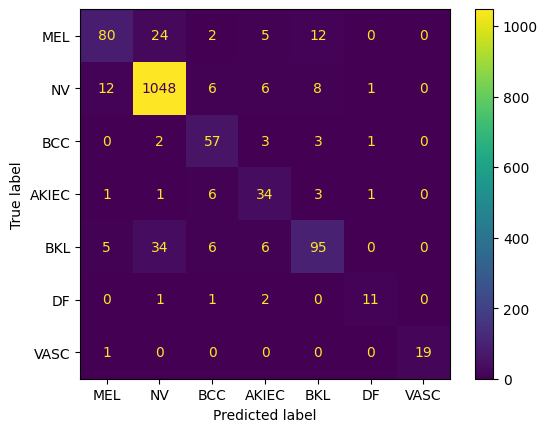

In [34]:
num_classes = 7

predlist = torch.zeros(0,dtype=torch.long, device='cpu')
lbllist = torch.zeros(0,dtype=torch.long, device='cpu')
predlistauc = torch.zeros(0,dtype=torch.long, device='cpu')
with torch.no_grad():
    for i, (inputs, classes) in enumerate(val_loader):
        model.eval()
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        # Append batch prediction results
        predlist=torch.cat([predlist,preds.view(-1).cpu()])
        lbllist=torch.cat([lbllist,classes.view(-1).cpu()])
        predlistauc = torch.cat([predlistauc,nn.functional.softmax(outputs, dim=1).cpu()])
predlist = predlist.numpy()
lbllist = lbllist.numpy()
predlistauc = predlistauc.numpy()

# Confusion matrix, classification report and AUC
conf_mat=confusion_matrix(lbllist, predlist)
target_names = ['MEL','NV','BCC','AKIEC','BKL','DF','VASC',]
ConfusionMatrixDisplay(conf_mat, display_labels=target_names).plot(values_format="d")
print(classification_report(lbllist, predlist, target_names=target_names))
lbllist_one_hot = nn.functional.one_hot(torch.tensor([lbllist]), num_classes=num_classes)
every_auc = roc_auc_score(lbllist_one_hot.view([predlistauc.shape[0], predlistauc.shape[1]]), 
                                          predlistauc, multi_class='ovr', average=None)
for i, every in enumerate(target_names):
    print(f'AUC of class {every} = {every_auc[i]}')

#### Step 11: Train the Model with better validation robustness.
We plan to make spin validation dataset with random rotations and horizontal flip and then check the metrics again.

In [35]:
val_transforms = transforms.Compose([
    transforms.Resize((224, 280)),
    torchvision.transforms.CenterCrop((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomApply(transforms=[transforms.RandomRotation(degrees=(-180, 180))], p=0.99),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])


val_dataset = datasets.ImageFolder(
    valdir, transform=val_transforms)

val_loader = torch.utils.data.DataLoader(
    val_dataset, batch_size=64, shuffle=True,
    pin_memory=False, drop_last=False)

              precision    recall  f1-score   support

         MEL       0.82      0.61      0.70       615
          NV       0.94      0.97      0.96      5405
         BCC       0.75      0.84      0.79       330
       AKIEC       0.65      0.73      0.69       230
         BKL       0.76      0.68      0.72       730
          DF       0.87      0.60      0.71        75
        VASC       0.97      0.95      0.96       100

    accuracy                           0.90      7485
   macro avg       0.82      0.77      0.79      7485
weighted avg       0.89      0.90      0.89      7485

AUC of class MEL = 0.9772771919858938
AUC of class NV = 0.9839956770796272
AUC of class BCC = 0.9922601274802533
AUC of class AKIEC = 0.9899457645401971
AUC of class BKL = 0.9724171846323879
AUC of class DF = 0.9949113810166441
AUC of class VASC = 0.9999702098849018


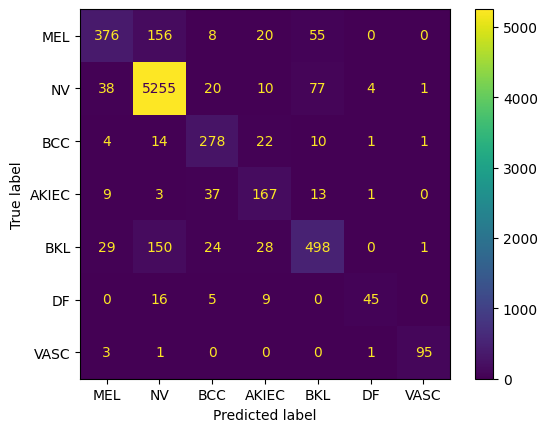

In [36]:
num_classes = 7

predlist=torch.zeros(0,dtype=torch.long, device='cpu')
lbllist=torch.zeros(0,dtype=torch.long, device='cpu')
predlistauc = torch.zeros(0,dtype=torch.long, device='cpu')
for n in range(5):
    with torch.no_grad():
        for i, (inputs, classes) in enumerate(val_loader):
            model.eval()
            inputs = inputs.to(device)
            classes = classes.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            # Append batch prediction results
            predlist=torch.cat([predlist,preds.view(-1).cpu()])
            lbllist=torch.cat([lbllist,classes.view(-1).cpu()])
            predlistauc = torch.cat([predlistauc,nn.functional.softmax(outputs, dim=1).cpu()])
predlist = predlist.numpy()
lbllist = lbllist.numpy()
predlistauc = predlistauc.numpy() 

# Confusion matrix, classification report and AUC
conf_mat=confusion_matrix(lbllist, predlist)
target_names = ['MEL','NV','BCC','AKIEC','BKL','DF','VASC',]
ConfusionMatrixDisplay(conf_mat, display_labels=target_names).plot(values_format="d")
print(classification_report(lbllist, predlist, target_names=target_names))
lbllist_one_hot = nn.functional.one_hot(torch.tensor([lbllist]), num_classes=num_classes)
every_auc = roc_auc_score(lbllist_one_hot.view([predlistauc.shape[0], predlistauc.shape[1]]), 
                                          predlistauc, multi_class='ovr', average=None)
for i, every in enumerate(target_names):
    print(f'AUC of class {every} = {every_auc[i]}')

#### Summary:
- In the end we were able to achieve 99% average F1 score for each class, and AUCs close to 100%!
- We could see that even on 2 classes with smallest representations (only 78 and 58 training images) we still were able to achieve 100 F1 score in both cases.
- We believe that the most important reason for the perfect result is well chosen data augmentations that helped not only to enrich our dataset, but also prevent overfitting.

#### References:
- https://datagen.tech/guides/computer-vision/resnet-50/
- https://viso.ai/deep-learning/resnet-residual-neural-network/
- https://www.kaggle.com/code/pmigdal/transfer-learning-with-resnet-50-in-pytorch

---
### <h3 style="color:deeppink;"><strong>Model 4: YOLOv8n-CLS</strong></h3>
---

#### Literature Review 

The pre-trained model by Ultralytics, ‘YOLOv8n’, is selected as one of the neural networks to be trained on the HAM10000 dataset. This model promises State of the Art (SOTA) and cutting-edge performance in flexibility and efficiency of training and implementation [https://docs.ultralytics.com/#where-to-start]. To obtain the best possible performance such that the whole method can provide effective and reliable skin lesion classification, this model may be useful in obtaining the best results possible.

The YOLOv8 model builds on the foundations of the original YOLO (You Only Look Once) object detection and image segmentation model. This model was selected as it remains one of the most popular methods of achieving a wide array of computer vision tasks, due to its relatively high efficiency and performance metrics. For example the implementation in [https://sidharkal.medium.com/image-classification-with-yolov8-40a14fe8e4bc] uses a Kaggle dataset that trains models to classify sports images. The dataset includes 8000 training images, 2000 test images, and 8 classes, which are all very similar numbers to that of the HAM10000 set. After 5 epochs of training, the YOLOv8 (specifically YOLOv8n-cls) model provided the following accuracy, loss, and confusion metrics:

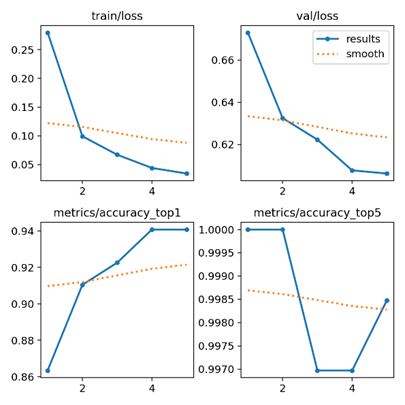
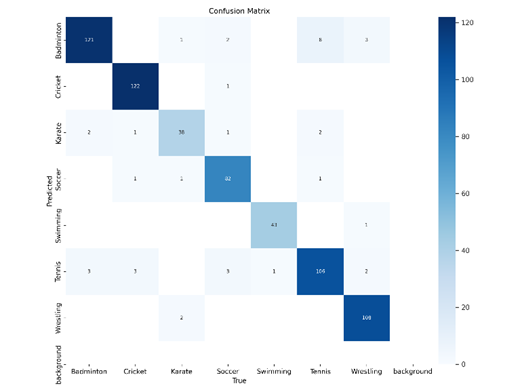

These results show very high levels of accuracy for classifying these sports classes after only 5 epochs, with a top 1 peak of 94 percent. As the HAM10000 set uses similar numbers of training data and classes, it is likely that YOLOv8 could be applied to provide a similarly impressive performance in classification of skin lesions.

The architecture of the neural network is as follows (Created by GitHub user ‘RangeKing’):

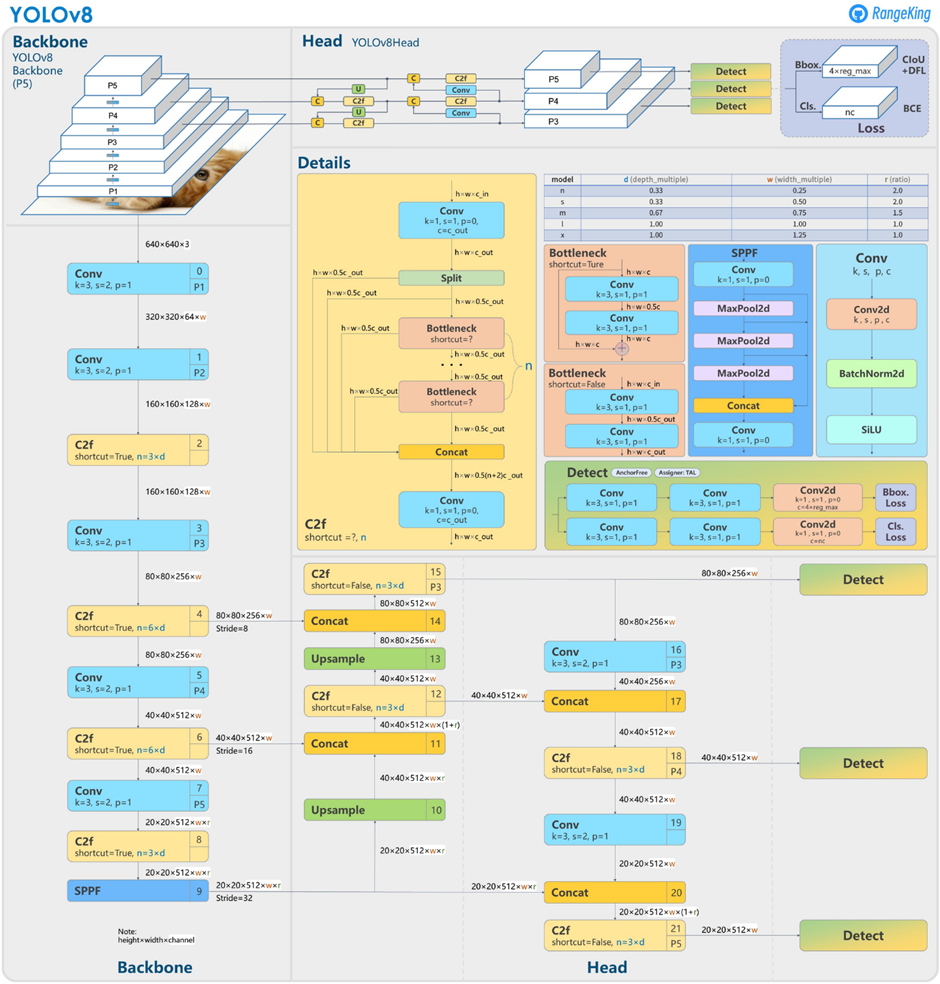

More in depth information is given upon training the YOLOv8n model, where the following architecture overview is displayed:

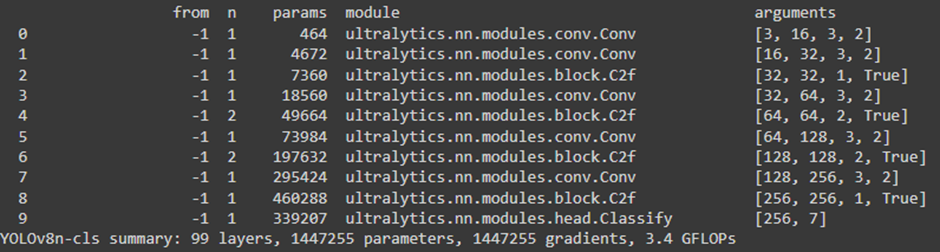

As the eighth official iteration of the YOLO model, YOLOv8 is the best performing version to date. Compared with the previous two iterations, the mean-average precision of YOLOv8 shows to be significantly greater when evaluated on the RF100 benchmark [https://blog.roboflow.com/whats-new-in-yolov8/]:

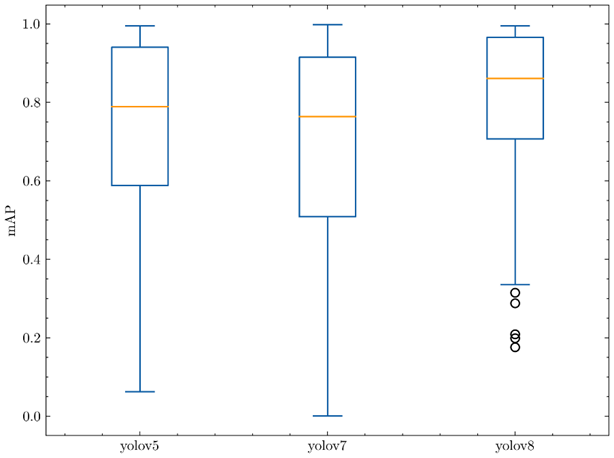

When used for classification, YOLO is pretrained on the ImageNet dataset [https://docs.ultralytics.com/tasks/classify/], and is available in 5 alternate versions:

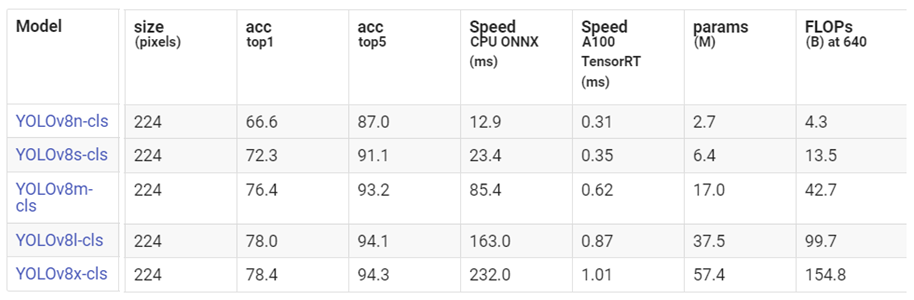

These versions vary in the number of parameters used in each model (ascending down the list), with YOLOv8n-cls being the smallest and fastest and YOLOv8x-cls being the slowest and most accurate. The ‘acc’ values are obtained from the model accuracies on the ImageNet validation set, and ‘speed’ is averaged over this same set.

For experimentation, the ‘YOLOv8n’ model was chosen due to its previously researched display of performance [https://sidharkal.medium.com/image-classification-with-yolov8-40a14fe8e4bc], and its much faster speeds when compared to the other alternative YOLOv8 models.

#### Training YOLOv8n

In [ ]:
# Load YOLOv8n model
model = YOLO('yolov8n-cls.pt')
# Load YOLOv8n model previously trained on HAM10000
#model = YOLO('best.pt')
#model = YOLO('last.pt')

100%|██████████| 5.28M/5.28M [00:00<00:00, 65.7MB/s]


In [ ]:
# Train the model for 30 epochs
# Results saved into 'runs/classify/train'
results = model.train(data='/skin', epochs=30, imgsz=(600,450))

Ultralytics YOLOv8.0.206 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/skin, epochs=30, patience=50, batch=16, imgsz=(600, 450), save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opti

---
### <h3 style="color:deeppink;"><strong>Results</strong></h3>
---

<table align="center">
  <tr>
    <th>Computational Costs</th>
    <th>VGG16</th>
    <th>ResNet50</th>
    <th>Custom Model</th>
    <th>YOLOv8n-CLS</th>
  </tr>
  <tr>
    <td>RAM (GB)</td>
    <td>6.5</td>
    <td>Value</td>
    <td>4.3</td>
    <td>Value</td>
  </tr>
  <tr>
    <td>GPU (GB)</td>
    <td>9.6</td>
    <td>Value</td>
    <td>7.2</td>
    <td>Value</td>
  </tr>
  <tr>
    <td>Average Time per epoch (s)</td>
    <td>65.32</td>
    <td>Value</td>
    <td>40.19</td>
    <td>Value</td>
  </tr>
  <tr>
    <td>Epochs trained</td>
    <td>130</td>
    <td>Value</td>
    <td>170</td>
    <td>Value</td>
  </tr>
  <tr>
    <td>Training time (s)</td>
    <td>8491.65</td>
    <td>Value</td>
    <td>6832.81</td>
    <td>Value</td>
  </tr>
</table>

#### YOLOv8n Results:

After training on the HAM10000 data for 30 epochs (using identical pre-processing methods to previous pre-trained models), the YOLOv8n model was able to obtain a peak of 99% top 1 accuracy as shown in the plots below, making it the best performing method yet.

The training phase provides more details on this training process. Although training on the full sized images (600 x 450), the process resizes the images in the set to 600 x 600, and then to 608 x 608, as it must be a multiple of max stride 32.

The YOLOv8n method also performs multiple forms of additional augmentation (albumentations) to the training data between epochs. These include:

-	RandomResizedCrop
-	HorizontalFlip
-	ColorJitter
-	Normalize
-	ToTensorV2

Further details on parameters used for each process are provided in the training output.

The optimiser used by the model is automatically determined. This resulted in the use of an Adam optimiser, with lr=0.000714, momentum=0.9, and parameter groups 26 weight decay=0.0, 27 weight decay=0.0005, and 27 bias decay=0.0.

From analysing the output data provided in the training phase, the model reaches this 99% top 1 accuracy at epoch 23. This means the model was trained to this high accuracy value in under 1 hour using the base Google Colab GPU runtime, and could be potentially much faster on more powerful graphics devices.

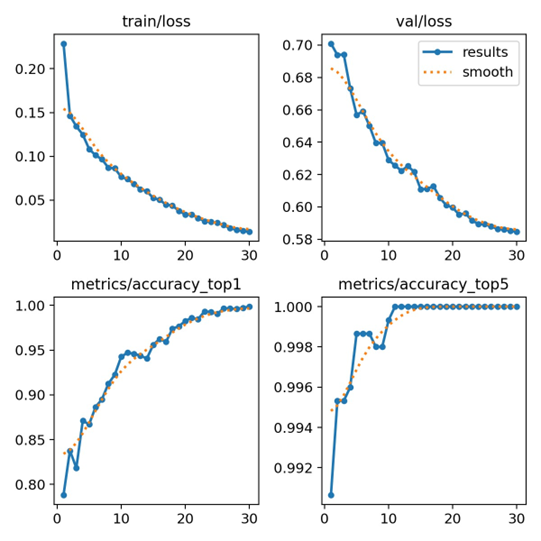

As visible in the above plots, the continuation of epochs caused the training and validation loss values to approach very close to zero values (lowest achieved training loss = 0.01377). The top 1 accuracy also shows a steady consistent increase towards 1.00 (highest achieved top 1 accuracy = 0.999). Both progressions follow an asymptotic approach toward 0 and 1 respectively, showing no evident signs of overfitting.

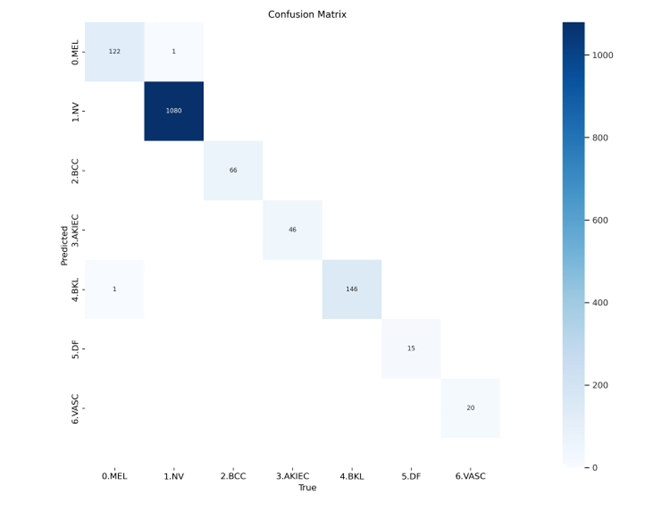

The impressive performance is further illustrated by the resulting confusion matrix. With only 2 visible misclassifications, the model is able to obtain 100% accuracy for the BCC, AKIEC, DF, VASC classes.

The final model stored in file ‘last.pt’ (/runs/classify/train/weights) for use in future classification tasks.

The Grad-Cam method allows for analysis of which parts of the image most affect classification score. Applying this method to the trained YOLOv8n model (building off of code created by Github user ‘rigvedrs’ https://github.com/rigvedrs/YOLO-V8-CAM), to following visualisations are obtained on individual images selected from each class:

#### Mel: 
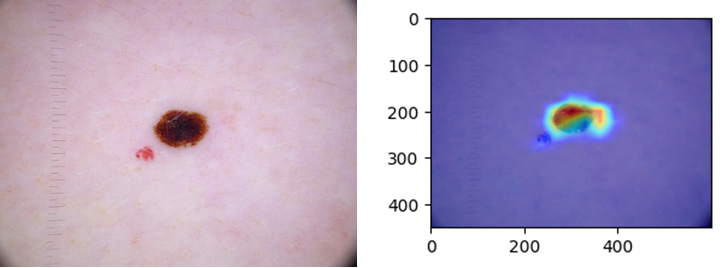
#### Akiec: 
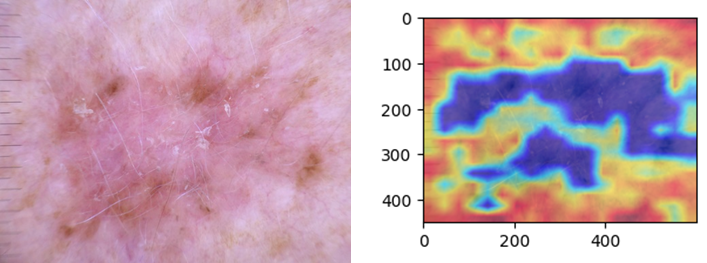
#### Bcc:
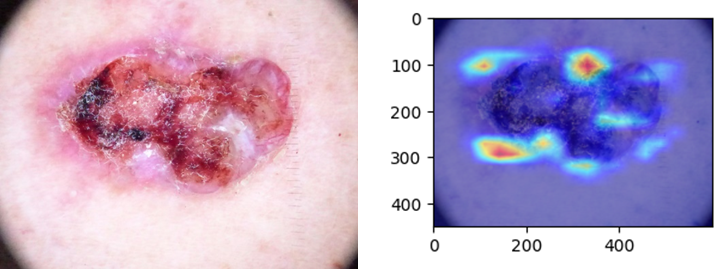
#### Bkl:
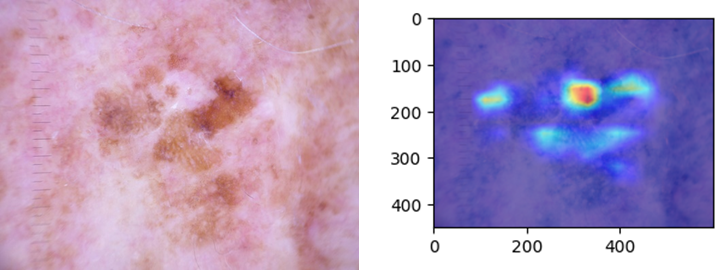
#### Df:
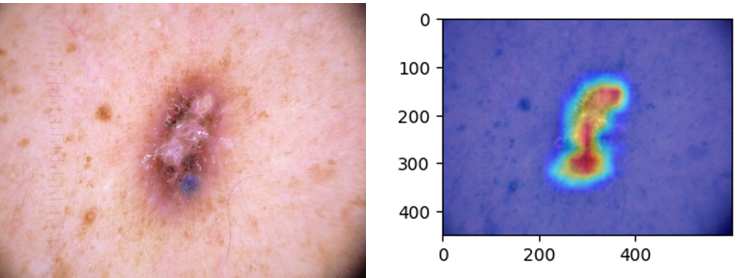
#### Nv:
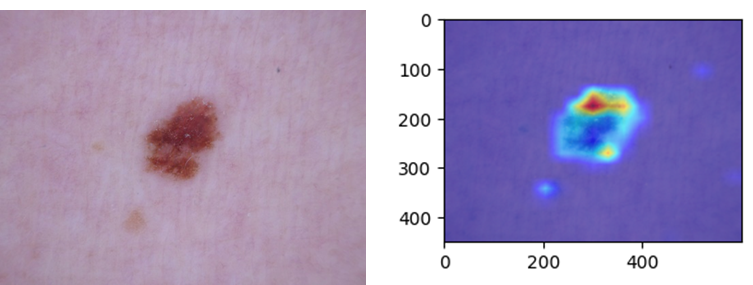
#### Vasc:
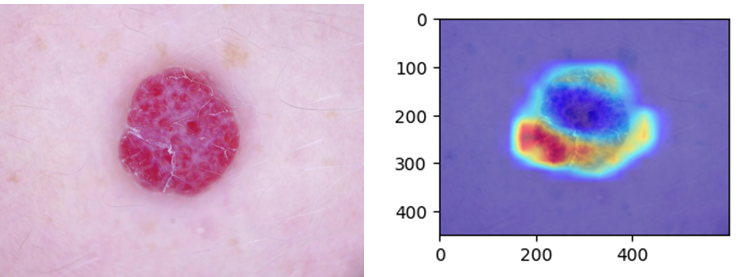

Some interesting behaviours can be gleaned from these results. The AKIEC heatmap appears to be the only class which focuses on the skin surrounding the lesion rather than the lesion itself. The BCC lesion heatmap similarly avoids the lesion itself, and focuses on a select few points on its perimeter. MEL has the most focused and uniform heatmap, while the rest have much more scattered and stretched patterns.

---
### <h3 style="color:deeppink;"><strong>Discussion</strong></h3>
---

The ability for the YOLOv8n implementation to provide 99% accuracy on the HAM10000 dataset makes it the most efficient, accurate, and reliable classification model used thus far. This high performance is likely a result of YOLO already being such a widely implementable and hugely popular pre-trained computer vision model. Combined with the previous image augmentation methods, this method makes the best possible use out of the HAM10000 dataset. It also requires a relatively low number of epochs to train to this standard, making this a suitable model for quick training on any additional skin lesion datasets.

One limitation of this method is that the model does not classify at 100% accuracy. Although suitable as a non-diagnosis guidance tool, this model cannot be used to offer perfectly reliable classifications all of the time, and lesions of concern must either be re-classified multiple times or validated by a qualified health professional. This is made evident in the confusion matrix, which still shows misclassifications for NV and MEL classes. Seeing as NV is a non-cancerous lesion, and MEL is cancerous, this discrepancy may impose future legal issues for false positives/negatives regarding these classes.

Another limitation arises from the HAM10000 dataset, which is limited to the 7 skin lesion classes previously mentioned. There are upwards of 10-20 different types of skin lesions, including squamous cell carcinoma, a cancerous lesion type not included in the dataset. If this method of classification were to be performed on one of these lesions, it would only provide an incorrect response from the 7 HAM10000 classes, as there exists no ‘unknown’ or ‘invalid’ classification mode. This also applied to images of clear skin, as any image provided will always result in the method estimating a skin lesion type even if none exists.

To make up for any missing classes and data types, it would be beneficial for this method to undergo further training other skin lesion datasets. This would allow this method to be more fit for classifying a wider range of concerning skin lesions, as well as improving overall reliability from the reduced number of false classifications. This can be further extended into training with images of clear skin so that the model can better differentiate between valid and invalid skin lesion images.

To follow forward with the goals set in the beginning, this method in its current form would require further refinement to make it an accessible means of skin lesion classification. An example of this would be to integrate this method with an easy-to-use interface for wider consumers such as a mobile app or Telehealth service. This way users can use their own smartphone camera to take snapshots of any skin lesion they are concerned about, where the app would then use this model to report a recommendation for the user. This can then be used to inform future actions for that person, or perhaps sent off to a medical practitioner for further analysis.

---
### <h3 style="color:deeppink;"><strong>References</strong></h3>
---

1. Department of Health and Welfare (2016), Skin Cancer (melanoma and non-melanoma skin cancers) in Australia. Available at https://www.aihw.gov.au/reports/cancer/skin-cancer-in-australia/summary

2. Tschandl P, Rosendahl C, Kittler H. The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. Sci Data. 2018 Aug 14;5:180161. doi: 10.1038/sdata.2018.161. PMID: 30106392; PMCID: PMC6091241.

3. Datagen Technologies (2022), Understanding VGG16: Concepts, Architecture, and Performance. Available at https://datagen.tech/guides/computer-vision/vgg16/#

4. N. Aburaed, A. Panthakkan, M. Al-Saad, S. A. Amin and W. Mansoor, "Deep Convolutional Neural Network (DCNN) for Skin Cancer Classification," 2020 27th IEEE International Conference on Electronics, Circuits and Systems (ICECS), Glasgow, UK, 2020, pp. 1-4, doi: 10.1109/ICECS49266.2020.9294814.

5. Computer Methods and Programs in Biomedicine Update 1 (2021) 100036. Available online 21 October 2021
2666-9900/© 2021 The Authors. Published by Elsevier B.V. This is an open access article under the CC BY-NC-ND license
(http://creativecommons.org/licenses/by-nc-nd/4.0/).BILSK: A bilinear convolutional neural network approach for skin
lesion classification